这一章是讲学习理论的，涉及了VC dimension以及bias,var的知识，比较难，数学推导很多，我做这些习题估计前前后后有三四十个小时，感觉还需要多体会几遍。

我的github地址：  
https://github.com/Doraemonzzz

个人主页：  
http://doraemonzzz.com/


参考资料:  
https://blog.csdn.net/a1015553840/article/details/51085129  
http://www.vynguyen.net/category/study/machine-learning/page/6/  
http://book.caltech.edu/bookforum/index.php  
http://beader.me/mlnotebook/

## Chapter2 Taining versus Testing

### Part 1:Exercise

#### Exercise 2.1 (Page 45)

By inspection , find a break point $k$ for each hypothesis set in Example 2.2(if there is one). Verify that $m_H (k) < 2^k$ using the formulas derived in that Example.

 Example 2.2可以参考课本43页，这里直接给出结果
 对例(1)来说，$m_H (N)=N+1$

| $N$  | m_H(N) | $2^N$ |
| ---- | ------ | ----- |
| 1    | 2      | 2     |
| 2    | 3      | 4     |

所以break point k可以取2

 对例(2)来说，$m_H (N)=\frac 1 2N^2+\frac 1 2N+1$

| $N$  | m_H(N) | $2^N$ |
| ---- | ------ | ----- |
| 1    | 2      | 2     |
| 2    | 4      | 4     |
| 3    | 7      | 8     |

所以break point k可以取3

对例(3)来说，$m_H (N)=2^N$，所以没有break point

#### Exercise 2.2 (Page 50)
(a) Verify the bound of Theorem 2.4 in the three cases of Example 2.2:  
  (i) Positive rays: $H$ consists of all hypotheses in one dimension of the form $h(x) = sign(x - a)$.  
  (ii) Positive intervals: $H$ consists of all hypotheses in one dimension that are positive within some interval and negative elsewhere.  
  (iii) Convex sets: $H$ consists of all hypotheses in two dimensions that are positive inside some convex set and negative elsewhere.  
  (Note: you can use the break points you found in Exercise 2.1)  
(b) Does there exist a hypothesis set for which $m_N(N) = N+ 2^{\lfloor \frac N 2 \rfloor}$  
(where $\lfloor \frac N 2 \rfloor$ is the largest integer $\le \frac N 2$)?

这题是我让我们在具体例子下验证下之前的理论。
先回顾下之前的理论：
$$
如果对于某个k, m_H (k) < 2^k,那么对于所有N
\\m_H(N)\le \sum_{i=0}^{k-1}\binom{N}{i}
$$
所以对于(i)来说，之前求得$k=2$，因此
$$
m_H(N)=N+1\le \sum_{i=0}^{k-1}\binom{N}{i}=\sum_{i=0}^{1}\binom{N}{i}=1+N
$$
对于(ii)来说，之前求得$k=3$，因此
$$
\begin{aligned}
m_H (N)&=\frac 1 2N^2+\frac 1 2N+1\le \sum_{i=0}^{k-1}\binom{N}{i}
\\&=\sum_{i=0}^{2}\binom{N}{i}=1+N+\frac 1 2N(N-1)
\\&=\frac 1 2N^2+\frac 1 2N+1
\end{aligned}
$$
对于(iii)来说，之前没有break point，但是$m_H (N)=2^N$，所以我们可以在定理中取$k=N+1$
$$
\begin{aligned}
m_H (N)&=2^N\le \sum_{i=0}^{k-1}\binom{N}{i}
\\&=\sum_{i=0}^{N}\binom{N}{i}=2^N
\end{aligned}
$$

(b)这题我的理解是否，因为如果成立，那么
$$
m_N(N) = N+ 2^{\lfloor \frac N 2 \rfloor}\le\sum_{i=0}^{k-1}\binom{N}{i}
$$
不等式左边是$N$的指数函数,右边是$N$的多项式，所以当$N$充分大时不可能成立。

#### Exercise 2.3 (Page 50)
Compute the VC dimension of $H$ for the hypothesis sets in parts (i), (ii),(iii) of Exercise 2.2(a).

这题需要计算VC维，由公式$k = d_{vc} + 1$，$k$为最小的break point，可以轻松得到。

(i)$k=2,d_{vc}=1$  
(ii)$k=3,d_{vc}=2$  
(iii)$k=+ \infty,d_{vc}=+ \infty$



#### Exercise 2.4 (Page 52)
Consider the input space $X=\{1\}\times R^d $(including the constant coordinate $x_0 = 1$). Show that the VC dimension of the perceptron (with $d+1$ parameters, counting $w_0$) is exactly $d+1$ by showing that it is at least $d+1$ and at most $d+1$, as follows.

(a) To show that $d_{vc}\ge d+1$, find $d+1$ points in $X$ that the perceptron can shatter. [Hint: Construct a nonsingular $(d+1) \times (d+1)$ matrix whose rows represent the $d+1$ points, then use the nonsingularity to argue that the perceptron can shatter these points.]

(b) To show that $d_{vc}\le d+1$, show that no set of $d+2$ points in $X$ can be shattered by the perceptron. [Hint: Represent each point in as a vector of length $d+1$, then use the fact that any $d+2$ vectors of length $d+1$ have to be linearl dependent. This means that some vector is a linear combination of all the other vectors.
Now, if you choose the cass of these other vectors carefully then the classification of the dependent vector will be dictated. Conclude that there is some dichotomy that cannot be implemented, and therefre that for $N\ge d+ 2, m_H (N) < 2^N$


这题实际上给出了证明$d_{vc}=d$的一般思路：证明$d_{vc}\le d$以及
$d_{vc}\ge d$。证明$d_{vc}\le d$只要找出$d$个点可以被shattered既可以，证明$d_{vc}\ge d$则需要说明任何$d+1$个点都不能被shattered

回到原题，先看(a)，构造一个$(d+1)\times(d+1)$矩阵
$$
\left(
\begin{matrix}
1&1&1&...&1\\
1&2&2^2&...&2^{d}\\
1&3&3^2&...&3^{d}\\
...&...&...&...&...\\
1&(d+1)&(d+1)^2&...&(d+1)^{d}
\end{matrix}
\right)
$$
它对应的行列式为范德蒙行列式，行列式的值不为$0$，因此对于任意的$y=(y_1,y_2,...y_{d+1})^T$，以下方程组恒有解。
$$
\left(
\begin{matrix}
1&1&1&...&1\\
1&2&2^2&...&2^{d}\\
1&3&3^2&...&3^{d}\\
...&...&...&...&...\\
1&(d+1)&(d+1)^2&...&(d+1)^{d}
\end{matrix}
\right)
\times
\left(
\begin{matrix}
x_1\\
x_2\\
x_3\\
...\\
x_{d+1}
\end{matrix}
\right)
=
\left(
\begin{matrix}
y_1\\
y_2\\
y_3\\
...\\
y_{d+1}
\end{matrix}
\right)
$$
换句话说，这$d+1$个特殊的点可以被shattered，因此$d_{vc}\ge d+1$

(b)不妨设感知机的模型为$f(x)=sign(w^Tx)$
我们知道在$d+1$维空间中的任何$d+2$个向量均线性相关,因此不妨设$z_{d+2}$可以被线性表出
$$
z_{d+2}=\sum_{i=1}^{d+1}k_iz_i\\
w^Tz_{d+2}=\sum_{i=1}^{d+1}w^Tk_iz_i\\
sign(w^Tz_{d+2})=sign(\sum_{i=1}^{d+1}k_iw^Tz_i)
$$
也就是说$z_{d+2}$的分类被$z_1,z_2...z_{d+1}$确定，那么
$(sign(z_1),sign(z_2)...sign(z_{d+1}),-sign(z_{d+2}))$这种情形必然无法被划分出来，因此$d_{vc}\le d+1$

综上所述$d_{vc}=d+1$

#### Exercise 2.5 (Page 56)
Suppose we have a simple learning model whose growth function is $m_H(N) = N+1$ , hence $d_{vc} =1$. Use the VC bound (2.12) to estimate the probability that $E_{out}$ will be within 0.1 of $E_{in}$ given 100 training examples. [Hint: The estimate wil be ridiculous.}

这里回顾下(2.12) (Page 53)  
Theorem 2.5 (VC generalization bound) . For any tolerance $\delta > 0$,
$$
E_{out}(g)\le E_{in}(g)+\sqrt {\frac 8 N ln{\frac {4m_H(2N)}\delta}}
$$
with probability$\ge1 -\delta$.

令
$$
\sqrt {\frac 8 N ln{\frac {4m_H(2N)}\delta}}=\epsilon 
$$
那么
$$
\frac 8 N ln{\frac {4m_H(2N)}\delta}=\epsilon^2\\
ln{\frac {4m_H(2N)}\delta}=\frac {N\epsilon^2}8\\
\frac {4m_H(2N)}\delta=e^{\frac {N\epsilon^2}8}\\
\delta=\frac {4m_H(2N)}{e^{\frac {N\epsilon^2}8}}
$$
对于此题来说
$$
\epsilon=0.1,N=100,m_H(N) = N+1
$$
带入计算得$\delta=709.5275096780147$，所以概率大于等于$-708.5275096780147$，这个结果太宽松了，等于没说。

In [2]:
import math
def m(n):
    return n+1

def delta(N,epsilon):
    return 4*m(2*N)/(math.exp(N*epsilon**2/8))

delta(100,0.1)

709.5275096780147

#### Exercise 2.6 (Page 60)
A data set has 600 examples. To properly test the performance of the final hypothesis, you set aside a randomly selected subset of 200 examples which are never used in the training phase; these form a test set. You use a learning model with 1,000 hypotheses and select the final hypothesis $g$ based on the 400 training examples. We wish to estimate $E_{out}(g)$. We have access to two estimates: $E_{in}(g)$, the in sample error on the 400 training examples; and, $E_{test}(g)$, the test error on the 200 test examples that were set aside.

(a) Using a 5% error tolerance ($\delta = 0.05$), which estimate has the higher 'error bar' ?  
(b) Is there any reason why you shouldn 't reserve even more examples for testing?


(a)这里要对$Hoeffding$不等式稍作变形
$$
P[|E_{in}(g)-E_{out}(g)|>\epsilon]\le 2M e^{-2\epsilon ^2N}
$$
令$ 2M e^{-2\epsilon^2N}=\delta $，那么$\epsilon=\sqrt{\frac 1 {2N}ln{\frac {2M}\delta}}$
因此有$1-\delta$的概率使得
$$
E_{out}(g)\le E_{in}(g)+\sqrt{\frac 1 {2N}ln{\frac {2M}\delta}}
$$

在这题中,$M=1000,N_1=400,N_2=200,\delta=0.05$，所以$E_{test}(g)$的'error bar'更大

(b)如果测试集过多的话，会使得训练集较少，这样训练出来的结果就比较差

#### Exercise 2.7 (Page 62)
For binary target functions, show that $P[h(x)\ne  f(x)]$ can be written as an expected value of a mean squared error measure in the following cases.

(a) The convention used for the binary function is $0$ or $1$
(b) The convention used for the binary function is $±1$
[int: The difference between (a) and (b) is just a scale.

这题是要将之前离散情况的误差函数改写为平方误差函数。

(a)注意此时$h(x)\ne  f(x)$要么是$h(x)=1,f(x)=0$或者$h(x)=0,f(x)=1$
因此
$$
P[h(x)\ne  f(x)]=P(|h(x)-f(x)|=1)
$$
而
$$
E((h(x)-f(x))^2)=1\times P(|h(x)-f(x)|=1)+0\times P(|h(x)-f(x)|=0)=P(|h(x)-f(x)|=1)
$$
所以
$$
P[h(x)\ne  f(x)]=E((h(x)-f(x))^2)
$$

(a)注意此时$h(x)\ne  f(x)$要么是$h(x)=1,f(x)=-1$或者$h(x)=-1,f(x)=1$
因此
$$
P[h(x)\ne  f(x)]=P(|h(x)-f(x)|=2)
$$
而
$$
E((h(x)-f(x))^2)=4\times P(|h(x)-f(x)|=2)+0\times P(|h(x)-f(x)|=0)=4P(|h(x)-f(x)|=2)
$$
所以
$$
P[h(x)\ne  f(x)]=\frac 1 4E((h(x)-f(x))^2)
$$

#### Exercise 2.8 (Page 63)
(a) Show that if $H$ is closed under linear combination (any linear combination of hypotheses in $H$ is also a hypothesis in $H$), then $\overline g \in H$ .  
(b) Give a model for which the average function $\overline g$ is not in the model's hypothesis set. [int: Use a very simple model.]  
(c) For binary classification, do you expect $\overline g$ to be a binary function?  

(a)$\overline g(x) =\frac 1 K \sum_{k=1}^Kg_k(x)$,所以如果$H$在线性运算下封闭，那么$\overline g \in H$

(b)考虑一个二元分类问题，第一组数据为全0，这样得出来的假设为$g_1(x)=0$，第二组数据全为1，这样得出来的假设为$g_2(x)=1$，$H=\{1,0\}$,但是$\overline g(x)=\frac 1 2(g_1(x)+g_2(x))$显然不属于$H$

(c)对于二元分类问题，肯定不希望$\overline g$是一个binary function，否则之后的数据要么全分为，要么全分为1，效果太差

### Part 2:Probelms

#### Problem 2.1 (Page 69) 
In Equation (2. 1), set $\delta = 0.03$ and let
$$
\epsilon(M,N,\delta)=\sqrt{\frac 1 {2N}ln\frac{2M}\delta}
$$
(a) For $M = 1$ , how many examples do we need to make $\epsilon \le0.05$?  
(b) For$ M = 100$, how many exam ples do we need to make $\epsilon \le0.05$?  
(c) For $M = 10, 000$, how many exam ples do we need to make $\epsilon \le0.05$?  

对等式稍作变形:
$$
\epsilon^2=\frac 1 {2N}ln\frac{2M}\delta\\
2N=\frac{ln\frac{2M}\delta}{\epsilon^2}\\
N=\frac{ln\frac{2M}\delta}{2\epsilon^2}
$$

In [1]:
from math import log

delta = 0.03
def f(M,epsilon):
    return log(2*M/delta)/(2*epsilon**2)

In [2]:
f(1,0.05)

839.9410155759853

In [3]:
f(100,0.05)

1760.9750527736032

In [4]:
f(10000,0.05)

2682.0090899712213

所以  
(a)839.9410155759853  
(b)1760.9750527736032  
(c)2682.0090899712213

#### Problem 2.2 (Page 69)
Show that for the learning model of positive rectangles (aligned horizontally or vertically), $m_H (4) = 2^4$ and $m_H (5) < 2^5$ . Hence, give a bound for $ m_H (N)$ .

题目给出的学习模型是两条平行于x轴的直线或者两条平行于y轴的直线。$m_H (4) = 2^4$这个比较简单，画图就可以了。$m_H (5) < 2^5$可以通过下图来看。

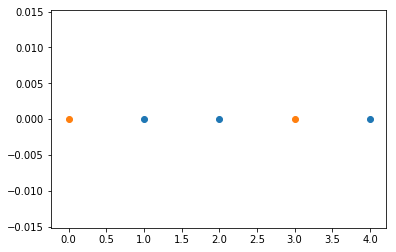

In [7]:
import matplotlib.pyplot as plt

plt.scatter([1,2,4],[0,0,0])
plt.scatter([0,3],[0,0])
plt.show()

显然这种情形无法被水平或者竖直的矩形分类，因此$m_H (5) < 2^5$。

将二维平面每个点投影到x轴上以及y轴上，二维平面上的点能被表出当且仅当在x轴上的投影点能被表出或者y轴上的投影点能被表出。设在x轴上一共能表出的情形为$f(N)$，x轴和y轴是对称的，因此$m_H(N)\le 2f(N)$（这个估计还是比较粗糙的，但是准确的估计暂时没想出来）。在x轴上，一共有以下两种情形:

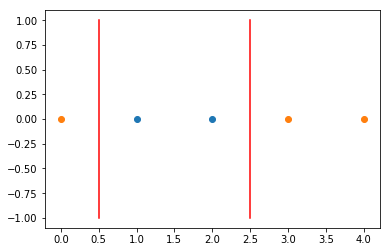

In [13]:
import matplotlib.pyplot as plt

plt.scatter([1,2],[0,0])
plt.scatter([0,3,4],[0,0,0])
plt.plot([0.5,0.5],[-1,1],color='red')
plt.plot([2.5,2.5],[-1,1],color='red')
plt.show()

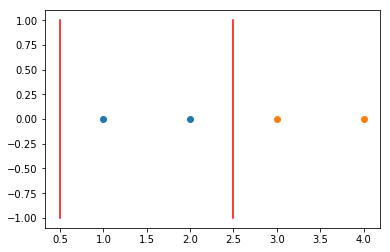

In [14]:
import matplotlib.pyplot as plt

plt.scatter([1,2],[0,0])
plt.scatter([3,4],[0,0])
plt.plot([0.5,0.5],[-1,1],color='red')
plt.plot([2.5,2.5],[-1,1],color='red')
plt.show()

第一种情形为矩形两侧都有元素，这种情形不考虑全-1或者全1的情况，所以这种情形共有$2C_{N-1}^2=(N-1)(N-2)$，乘以2是因为矩形内部可以为-1，也可以为1。  
第二种情形为矩形只有一侧有元素，这种情形共有$2(N+1)-2=2N$，减2是因为全1或者全 -1的情形被重复算了。

因此
$$
f(N)\le (N-1)(N-2)+2N=N^2-N+2\\
m_H(N)\le 2f(N)=2N^2-2N+4
$$

#### Problem 2.3 (Page 69) 
Compute the maximum number of dichotomies, $m_H (N)$,for these learning models, and consequently compute $d_{vc}$ , the VC dimension.  
(a) Positive or negative ray: $H$ contains the functions which are + 1 on $[a, +\infty)$(for some a) together with those that are +1 on $( - \infty , a]$ (for some a).  
(b) Positive or negative interval : $H$ contains the functions which are + 1 on an interval $[a, b]$ and -1 elsewhere or -1 on an interval $[a, b]$ and +1 elsewhere.  
(c) Two concentric spheres in $R^d$: $H$ contains the functions which are +1 for $a \le \sqrt {x_1^2 + . . . + x_d^2}\le b$.

计算$m_H (N)$以及$d_{vc}$  
(a)这题其实就相当于在$N$个点中画了一条直线，左边的为-1，右边的为1，或者左边的为1，右边的为-1，除去全1和全-1的情形，一共有$2(N-1)$种，那么加上全-1和全1，一共有$2N-2+2=2N$种情形。因此
$$
m_H (N)=2N,d_{vc}=2
$$
(b)这题就是我们上一题给出上界的那种假设，具体的可以参考那一题。因此
$$
m_H (N)=N^2-N+2,d_{vc}=3
$$
(c)做映射$y=\sqrt {x_1^2 + . . . + x_d^2}$，所以这个问题可以化为类似(b)的问题(注意这里不同之处在于$[a,b]$区间内的元素只能为$+1$)。但用我之前的思路考虑比较麻烦，这里用另一种思路。注意这里两圆之间的部分为$+1$，因此问题为$d$个点之间以及两侧$d+1$个间隔中挑选2个，最后要需要考虑全$-1$的情形，因此
$$
m_H (N)=C_{N+1}^2+1=\frac{N(N+1)}2+1,d_{vc}=2
$$


#### Problem 2.4 (Page 69)
Show that $B(N, k) =\sum_{i=0}^{k-1}\binom N i$ by showing the other
direction to Lemma 2.3, namely that
$$
B(N, k) \ge\sum_{i=0}^{k-1}\binom N i
$$
To do so, construct a specific set of $\sum_{i=0}^{k-1}\binom N i$ dichotomies that does not shatter any subset of $k$ variables. [Hint: Try limiting the number of -1 's in each dichotomy]

考虑$N$个元素的点集，点集中最多有$k-1$个$-1$，那么这样的点集有$\sum_{i=0}^{k-1}\binom N i$种。考虑$k$个元素的子集，然么$(-1,-1...-1)$(全为$-1$的情形)必然无法被表出，因为最多有$k-1$个点为$-1$。那么由$B(N,k)$的定义知
$$
B(N, k) \ge\sum_{i=0}^{k-1}\binom N i
$$
因此
$$
B(N, k) =\sum_{i=0}^{k-1}\binom N i
$$


#### Problem 2.5 (Page 69)
Prove by induction that $\sum_{i=0}^{D}\binom N i\le N^D+1$ , hence
$$
m_H(N)\le N^{d_{vc}}+1
$$

使用数学归纳法。  
$D=0$时，$\sum_{i=0}^{D}\binom N i=1$，$N^D+1=1+1=2$
所以$D=0$时，不等式成立。  
假设$D=k$时不等式成立，$D=k+1$时
$$
\sum_{i=0}^{k+1}\binom N i=\sum_{i=0}^{k}\binom N i+\binom N {k+1}\le N^k+1+\binom N {k+1}
$$
对$\binom N {k+1}$进行放缩
$$
\binom N {k+1}=\frac{N(N-1)...(N-k)}{(k+1)!}\le N(N-1)...(N-k)\le N^k(N-1)
$$
因此
$$
\begin{aligned}
\sum_{i=0}^{k+1}\binom N i&\le N^k+1+\binom N {k+1}
\\& \le N^k+1+N^k(N-1)
\\&=N^{k+1}+1
\end{aligned}
$$
所以对$D=k+1$时不等式也成立。
由之前结论我们知道
$$
m_H(N)\le \sum_{i=0}^{d_{vc}}\binom N i
$$
那么
$$
m_H(N)\le \sum_{i=0}^{d_{vc}}\binom N i\le N^{d_{vc}}+1
$$

#### Problem 2.6 (Page 70)
Prove that for $N \ge d$,
$$
\sum_{i=0}^{d}\binom N i\le (\frac {eN}d )^d
$$
We suggest you first show the following intermediate steps.  
(a) $\sum_{i=0}^{d}\binom N i\le \sum_{i=0}^{d}\binom N i(\frac N d)^{d-i}\le (\frac N d)^d\sum_{i=0}^{N}\binom N i(\frac d N)^i$  
(b) $\sum_{i=0}^{N}\binom N i(\frac d N)^i\le e^d$[Hints: Binomial theorem;$(1+\frac 1 x)^x \le e$ for $x\ge 0$
Hence, argue that $m_H(N)\le (\frac {eN}{d_{vc}} )^{d_{vc}}$

(a)因为$N\ge d,d\ge i$，所以$(\frac N d)^{d-i}\ge 1$
那么
$$
\sum_{i=0}^{d}\binom N i\le \sum_{i=0}^{d}\binom N i(\frac N d)^{d-i}=(\frac N d)^d \sum_{i=0}^{d}\binom N i (\frac d N)^{i}\le (\frac N d)^d\sum_{i=0}^{N}\binom N i(\frac d N)^i
$$
最后一步由$d\le N$

(b)由二项式定理
$$
\sum_{i=0}^{N}\binom N i(\frac d N)^i=\sum_{i=0}^{N}\binom N i(\frac d N)^i1^{N-i}=(1+\frac dN)^N
$$
由$(1+\frac 1 x)^x \le e$，我们知道
$$
(1+\frac dN)^N=(1+\frac dN)^{\frac N d d}\le e^d
$$
因此
$$
\sum_{i=0}^{N}\binom N i(\frac d N)^i=(1+\frac dN)^N\le e^d\\
\sum_{i=0}^{d}\binom N i\le (\frac N d)^d\sum_{i=0}^{N}\binom N i(\frac d N)^i\le (\frac N d)^d e^d=(\frac {eN}d )^d
$$

由之前结论我们知道
$$
m_H(N)\le \sum_{i=0}^{d_{vc}}\binom N i
$$
那么由这题的结论可得
$$
m_H(N)\le (\frac {eN}{d_{vc}} )^{d_{vc}}
$$

这题和之前一题都是对$m_H(N)$给出一个多项式上界。

#### Problem 2.7 (Page 70)
Plot the bounds for $m_H (N)$ given in Problems 2.5 and 2.6
for $d_{vc} = 2$ and $d_{vc} = 5$. When do you prefer one bound over the other?

作图题

In [15]:
import matplotlib.pyplot as plt
import math

def f1(N,d):
    return N**d+1

def f2(N,d):
    return (math.exp(1)*N/d)**d

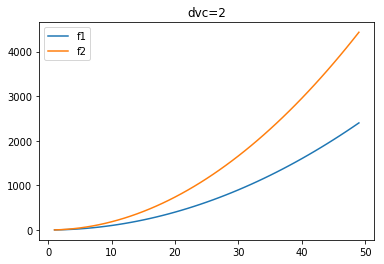

In [18]:
n=range(1,50)
m1=[f1(i,2) for i in n]
m2=[f2(i,2) for i in n]

plt.plot(n,m1,label='f1')
plt.plot(n,m2,label='f2')
plt.legend()
plt.title('dvc=2')
plt.show()

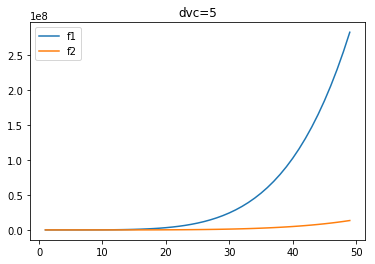

In [19]:
n=range(1,50)
m1=[f1(i,5) for i in n]
m2=[f2(i,5) for i in n]

plt.plot(n,m1,label='f1')
plt.plot(n,m2,label='f2')
plt.legend()
plt.title('dvc=5')
plt.show()

上图中，f1表示2.5得到的上界，f2表示2.6得到的上界，可以看到，当$d_{vc}=2$时，2.5得到的上界要明显好于2.6得到的上界，而当$d_{vc}=5$时，2.6得到的上界要明显好于2.5得到的上界，我们来简单分析下原因。  
2.5得到的上界
$$
N^{d_{vc}}+1
$$
2.6得到的上界
$$
(\frac {eN}{d_{vc}} )^{d_{vc}}
$$
当$d_{vc}=2$时，$\frac {e}{d_{vc}}>1$，所以当N充分大时，$(\frac {eN}{d_{vc}} )^{d_{vc}}$明显大于$N^{d_{vc}}+1$
而当$d_{vc}=5$时，$\frac {e}{d_{vc}}<1$，所以当N充分大时，$(\frac {eN}{d_{vc}} )^{d_{vc}}$明显小于$N^{d_{vc}}+1$

所以当$d_{vc}\le 2$时，选$N^{d_{vc}}+1$作为上界，其余情形选择$
(\frac {eN}{d_{vc}} )^{d_{vc}}$作为上界。

#### Problem 2.8 (Page 70)
Which of the following are possible growth functions $m_H (N)$for some hypothesis set:
$$
1+N;1+ N +\frac {N(N - 1)} 2;2^N;2^{\lfloor \sqrt N \rfloor} ;2^{\lfloor \frac N 2 \rfloor};1+N+\frac {N(N-1)(N-2)} 6
$$

我们知道$m_H (N)$要么等于$2^N$，要么有一个多项式的上界，根据这两点，除了$2^{\lfloor \sqrt N \rfloor},2^{\lfloor \frac N 2 \rfloor}$以外，其余函数均有可能成为$m_H (N)$

#### Problem 2.9 (Page 70)
[hard] For the perceptron in $d$ dimensions, show that
$$
m_H(N)=2\sum_{i=0}^d \binom {N-1} i\\
{Hint: Cover(1965)\ in\ Further\ Reading.}
$$
Use this formula to verify that $d_{vc} = d + 1$ by evaluating $m_H(d + 1)$ and $m_H(d + 2)$ . Plot $m_H(N)/2N$ for $d = 10$ and $N \in [1, 40]$ . If you generate a random dichotomy on $N$ points in 10 dimensions, give an upper bound on the probability that the dichotomy will be separable for N = 10, 20, 40.

这题比较难，我也是查阅了网上资料才思考出来。[参考资料](http://web.mit.edu/course/other/i2course/www/vision_and_learning/perceptron_notes.pdf)

为了后续叙述方便，记$N$个数据，维度为$d$的$m_H(N)$为$f(N,d)$，我们考虑$f(N,d)$的递推关系。

假设$B=\{(b_1,b_2...b_N),b_i \in \{1,-1\}\}$是维度$d$,$N$个点所有可以被表示出来的组合，也就是说$\forall (b_1,b_2...b_N) \in B,\exists w\in R^d,(x_1,x_2...x_N),(x_i\in R^d)$使得
$$
(sign(w^Tx_1),sign(w^Tx_2)...sign(w^Tx_N))=(b_1,b_2...b_N)
$$
那么此时增加一个点$x_{N+1}$
$$
(sign(w^Tx_1),sign(w^Tx_2)...sign(w^Tx_N),sign(w^Tx_{N+1}))=(b_1,b_2...b_N,sign(w^Tx_{N+1}))
$$
现在考虑以下两种情况：

- 情形1
  $w^Tx_{N+1}!=0$,那么$或sign(w^Tx_{N+1})=1或$${-}1$,那么$(b_1,b_2...b_N,sign(w^Tx_{N+1}))$可以直接被表示出来，记满足这个条件的数量为$C_1$

- 情形2
  $w^Tx_{N+1}=0$,那么此时需要对$w$进行旋转，可以进行如下处理。

  令$t={max}|x_{N+1}^Tx_i|(i=1...N),M={min}|w^Tx_i|(i=1...N),k=\frac M {2t}$
  那么对于$w_1=w \pm k y$

$$
w_1^Tx_i=(w\pm kx_{N+1})^Tx_i=w^Tx_i\pm kx_{N+1}^Tx_i\\
|kx_{N+1}^Tx_i|=|\frac M {2t}x_{N+1}^Tx_i|=\frac M {2t}|x_{N+1}^Tx_i|\le \frac M{2t}\times t=\frac M 2\le\frac {|w^Tx_i|}2
$$

  对于任何非零的数$a$，$a\pm\frac{|a|}2$与$a$同号，那么$w_1^Tx_i$与$w^Tx_i$同号。再来观察$w_1^Tx_{N+1}$的符号，注意$w^Tx_{N+1}=0$
$$
w_1^Tx_{N+1}=(w \pm k x_{N+1})^Tx_{N+1}=w^Tx_{N+1} \pm k x_{N+1}^Tx_{N+1}=\pm k x_{N+1}^Tx_{N+1}
$$
  所以当$w_1=w + k y$时,$w_1^Ty>0$,当$w_1=w - k y$时,$w_1^Ty<0$  
  综上所述，当$w^Tx_{N+1}=0$时，通过旋转$w$，$(b_1,b_2...b_N,\pm1)$均可以被表示出来，记满足这个条件的数量为$C_2$

接下来分析$C_1$以及$C_2$。首先看$C_2$，$C_2$是有一个约束条件$w^Tx_{N+1}=0$下的最大可表示出来的数量，所以这相当于$d-1$维（有一个约束条件，所以减小一个维度）下$N$个点的最大可表示出来的数量乘以2（$sign(w^Tx_{N+1})$可正可负），也就是说$C_2=2f(N,d-1)$。而$C_1$相当于所有$f(N,d)$减去满足$w^Tx_{N+1}=0$条件下的表示数量$f(N,d-1)$，$C_1=f(N,d)-f(N,d-1)$

因此
$$
f(N+1,d)=C_1+C_2=2f(N,d-1)+f(N,d)-f(N,d-1)=f(N,d)+f(N,d-1)
$$
其余的步骤由数学归纳法即可。
$$
f(N+1,d)=f(N,d)+f(N,d-1)=2\sum_{i=0}^d \binom {N-1}i+2\sum_{i=0}^{d-1} \binom {N-1}i
$$
我们知道$\binom n k=\binom {n-1} k+\binom {n-1} {k-1}$。因此
$$
\begin{aligned}
f(N+1,d)&=2\sum_{i=0}^d \binom {N-1}i+2\sum_{i=0}^{d-1} \binom {N-1}i\\
&=2+2\sum_{i=1}^d \binom {N-1}i+2\sum_{i=0}^{d-1} \binom {N-1}i\\
&=2+2\sum_{i=1}^d \binom {N-1}i+2\sum_{i=1}^{d} \binom {N-1}{i-1}\\
&=2+2\sum_{i=1}^d \binom {N}i\\
&=2\sum_{i=0}^d \binom {N}i
\end{aligned}
$$
因此结论成立。

下面计算下$d_{vc}$
$$
m_H(d+1)=2\sum_{i=0}^d \binom {d} i=2^{d+1}\\
m_H(d+2)=2\sum_{i=0}^d \binom {d+1} i=2(2^{d+1}-1)=2^{d+2}-2<2^{d+2}
$$
所以$d_{vc}=d+1$，这也符合我们之前的论述。

剩余部分是作图，注意这里的概率其实就是$\frac {m_H(N)} {2^N}$，因为一共有$2^N$种，而可表示出来的一共有$m_H(N)$种

In [22]:
from scipy.special import comb
def m(N,d):
    result=0
    k=min(d,N-1)
    for i in range(k+1):
        result+=comb(N-1,i)
    return 2*result

In [25]:
x=range(1,41)
d=10
y=[m(i,d)/2**i for i in x]

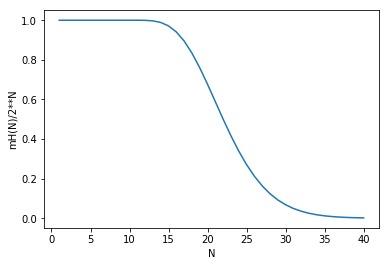

In [29]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.xlabel('N')
plt.ylabel('mH(N)/2**N')
plt.show()

In [32]:
print([m(i,d)/2**i for i in [10,20,40]])

[1.0, 0.67619705200195313, 0.0016889239559532143]


概率如上所示，可以看到对于$d=10$，只要有40个点就几乎不可能表出了

#### Problem 2.10 (Page 70)

Show that $m_H(2N) \le m_H (N)^2 $, and hence obtain a generaIization bound which only involves $m_H (N) $

将$2N$个点分为前$N$个和后$N$个，记前$N$个点的区分方法为$f_1(N)$,后$N$个点的区分方法为$f_2(N)$,由乘法原理，$m_H(2N)\le f_1(N)\times f_2(N)$，显然$f_1(N)\le m_H(N),f_2(N)\le m_H(N)$。因此
$$
m_H(2N) \le m_H (N)^2
$$


#### Problem 2.11 (Page 70)

Suppose $m_H(N) = N + 1$, so $d_{vc} = 1$ . You have 100 training examples. Use the generalization bound to give a bound for $E_{out}$ with confidence 90%. Repeat for $N = 10, 000$.    

这题要使用上面证明的不等式，先回顾下书本第58页的公式
$$
E_{out}(g)\le E_{in}(g)+\sqrt {\frac 8 N ln(\frac {4m_H({2N})} \delta )}的概率大于等于1-\delta
$$
对这题来说，$\delta=0.1$。回顾上题的不等式可得：
$$
\sqrt {\frac 8 N ln(\frac {4m_H({2N})} \delta )}\le\sqrt {\frac 8 Nln(\frac{4 m_H (N)^2}\delta)}
$$
下面计算下

In [1]:
import math

delta=0.1

def f(N):
    return (8/N*math.log(4*(N+1)**2/delta))**0.5

In [2]:
f(100)

1.016626597637361

In [3]:
f(10000)

0.13299551928713077

#### Problem 2.12 (Page 71)

For an $H$ with $d_{vc} = 10$, what sample size do you need (as prescribed by the generalization bound) to have a 95% confidence that your generalization error is at most 0.05? 

在此回顾下课本58页的公式
$$
E_{out}(g)\le E_{in}(g)+\sqrt {\frac 8 N ln(\frac {4({(2N)}^{d_{vc}}+1)} \delta )}的概率大于等于1-\delta
$$
回到这题，题目中$\delta =0.05,\sqrt {\frac 8 N ln(\frac {4({(2N)}^{d_{vc}}+1)} \delta )}=0.05$
这个方程直接解的话不好解，可以作图看一下

In [8]:
import math
import matplotlib.pyplot as plt

delta=0.05
dvc=10

def f(N):
    return (8/N*math.log(4*((2*N)**dvc+1)/delta))**0.5-0.05

n=1
while(True):
    if(f(n)<=0):
        break
    else:
        n+=1

print(n)

452957


可以看到这个数字非常大，我们再来作图看一下

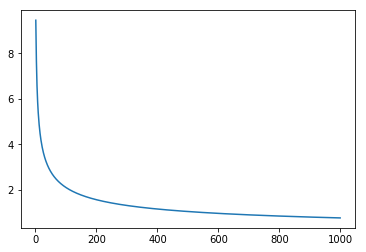

In [9]:
x=range(1,1000)
y=[f(i) for i in x]

plt.plot(x,y)
plt.show()

#### Problem 2.13 (Page 71)

 (a) Let $H = \{h_1 , h_2 , . . . , h_M\}$ with some finite $M$. Prove that $d_{vc}(H) \le log_2 M. $

(b) For hypothesis sets $H_1,H_2,...,H_k$ with finite VC dimensions $d_{vc}(H_k)$, derive and prove the tightest upper and lower bound that you can get on $dvc (\cap _{k=1}^KH_k) $· 

(c) For hypothesis sets $H_1,H_2,...,H_k$ with finite VC dimensions $d_{vc}(H_k)$, derive and prove the tightest upper and lower bounds that you can get on $d_{vc} (\cup _{k=1}^KH_k) $·   

(a)因为有$M$个假设，所以一共能区分$M$ 种情况，$d_{vc}(H)$表示对于$n=d_{vc}(H)$组数据，这$M$个假设可以区分出来所有$2^{d_{vc}(H)}$种情形，而一共最多能区分$M$种情形，因此
$$
2^{d_{vc}(H)}\le M\\
d_{vc}(H)\le log_2(M)
$$
(b)首先有直觉反应：
$$
如果A\subseteq B,那么d_{vc}(A)\le d_{vc}(B)
$$
所以猜测
$$
0\le dvc (\cap _{k=1}^KH_k)\le {min}\{(d_{vc}(H_k))\}_{k=1}^K
$$
$0\le dvc (\cap _{k=1}^KH_k)$是显然的，另一边使用反证法，记$d_1=dvc (\cap _{k=1}^KH_k),d_2={min}\{(d_{vc}(H_k))\}_{k=1}^K$

若$d_1\ge d_2+1$，那么$\cap _{k=1}^KH_k$可以shatter $d_2+1$个点，那么至少存在一个$H_i(i=1...k)$，使得$H_i$也可以shatter $d_2+1$个点，这就与$d_2={min}\{(d_{(vc)}(H_k))\}_{k=1}^K$相矛盾了，所以
$$
dvc (\cap _{k=1}^KH_k)\le {min}\{(d_{vc}(H_k))\}_{k=1}^K
$$
并且是最强上界。

接着这个思路，也可以把一下结论证明一下。
$$
如果A\subseteq B,那么d_{vc}(A)\le d_{vc}(B)
$$
反正法，如果$d_{vc}(A)\ge d_{vc}(B)+1$，那么$A$可以shatter $d_{vc}(B)+1$个点，由$A\subseteq B$。那么$B$也可以shatter $d_{vc}(B)+1$个点，矛盾。因此该结论成立。

(c)这题参考了别人的笔记，[笔记地址](http://beader.me/mlnotebook/section2/vc-dimension-three.html)

这题说实话要不是之前做过林老师的作业，结论我是猜不出的，所以这里就直接证明了，先上结论。
$$
{max}\{d_{vc}(H_k)\}_{k=1}^K\le d_{vc} (\cup _{k=1}^KH_k)\le K-1+\sum_{k=1}^K d_{vc} (H_k)
$$
左边比较简单，由之前的结论即可。
$$
因为H_k \subseteq \cup _{k=1}^KH_k\\
所以d_{vc}(H_k)\le d_{vc} (\cup _{k=1}^KH_k)(k=1...K)\\
{max}\{d_{vc}(H_k)\}_{k=1}^K\le d_{vc} (\cup _{k=1}^KH_k)
$$
观察下右边的形式，其实只要证明$K=2$的情形然后使用数学归纳法即可，下面记$d_1=d_{vc}(H_1),d_2=d_{vc}(H_2)$，考虑成长函数$m_H(N)$，首先
$$
m _ {H_1\cup H_2}(N) \le m_{H_1}(N)+ m_{H_2}(N)
$$
对于$N$个元素，$H_1\cup H_2$最多可以表示出$m _ {H_1\cup H_2}(N)$种分类，对于每种分类，或者由$H_1$表示，或者由$H_2$表示，所以$m _ {H_1\cup H_2}(N)$应该小于$H_1$和$H_2$表示出来的分类之和。而$H_1$最多可以表示出$m_{H_1}(N)$种分类，$H_2$最多可以表示出$m_{H_2}(N)$种分类，因此上述不等式成立。

回到原题，使用上述结论以及VC不等式，我们可得
$$
m _ {H_1\cup H_2}(N) \le m_{H_1}(N)+ m_{H_2}(N)\le\sum _ {i=0} ^ {d_1} \binom{N}{i} + \sum _ {i=0} ^ {d_2} \binom{N}{i}
$$
接着我们使用反证法，如果
$$
d_{vc}(H_1 \cup H_2)\ge 2+d_{vc}(H_1)+d_{vc}(H_2)=d_1+d_2+2
$$
那么
$$
m _ {H_1\cup H_2}(d_1+d_2+2)=2^{d_1+d_2+2}
$$
把$N=d_1+d_2+2$带入$\sum _ {i=0} ^ {d_1} \binom{N}{i} + \sum _ {i=0} ^ {d_2} \binom{N}{i}$得
$$
\begin{aligned}
\sum _ {i=0} ^ {d_1} \binom{N}{i} + \sum _ {i=0} ^ {d_2} \binom{N}{i}&=\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {i=0} ^ {d_2} \binom{d_1+d_2+2}{i}
\\&=\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {i=0} ^ {d_2} \binom{d_1+d_2+2}{d_1+d_2+2-i}
\\&令j=d_1+d_2+2-i，那么j的范围从d_1+2到d_1+d_2+2
\\&=\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {j=d_1+2} ^ {d_1+d_2+2} \binom{d_1+d_2+2}{j}
\\&=2^{d_1+d_2+2}-\binom{d_1+d_2+2}{d_1+1}
\\&<2^{d_1+d_2+2}
\end{aligned}
$$
所以
$$
m _ {H_1\cup H_2}(d_1+d_2+2)\le\sum _ {i=0} ^ {d_1} \binom{d_1+d_2+2}{i} + \sum _ {i=0} ^ {d_2} \binom{d_1+d_2+2}{i}<2^{d_1+d_2+2}
$$
与之前所述矛盾。因此
$$
d_{vc}(H_1 \cup H_2)\le 1+d_{vc}(H_1)+d_{vc}(H_2)=d_1+d_2+1\\
当K=2时，d_{vc} (\cup _{k=1}^KH_k)\le K-1+\sum_{k=1}^K d_{vc} (H_k)成立
$$
假设$K=n$时不等式成立，$K=n+1$时
$$
\begin{aligned}
d_{vc} (\cup _{k=1}^{n+1}H_k)&=d_{vc} ((\cup _{k=1}^{n}H_k)\cup H_{n+1})
\\&\le1+d_{vc} (\cup _{k=1}^{n}H_k)+d_{vc}( H_{n+1})
\\&\le1+n-1+\sum_{k=1}^n d_{vc} (H_k)+d_{vc}( H_{n+1})
\\&=n+\sum_{k=1}^{n+1} d_{vc} (H_k)
\end{aligned}
$$
因此$K=n+1$时不等式也成立

#### Problem 2.14 (Page 71)

Let $\mathcal{H}_1 , \mathcal{H}_2, . . . , \mathcal{H}_K$ be $K$ hypothesis sets with finite VC dimension $d_{vc}$· Let $\mathcal{H}=\mathcal{H}_1 \cup \mathcal{H}_2\cup . . . \cup\mathcal{H}_K$ be the union of these models.

(a) Show that $d_{vc}(\mathcal{H}) < K(d_{vc} + 1)$. 

(b) Suppose that $l$ satisfies $2^l > 2Kl^{d_{vc}}$ . Show that $d_{vc}(\mathcal{H})\le l$. 

(c) Hence, show that 
$$
d_{vc}(\mathcal{H})\le min(K(d_{vc} + 1), 7(d_{vc} + K) log_2 (d_{vc}K))
$$
That is, $d_{vc}(H) = O(max(d_{vc}, K) log_2 max(d_{vc}, K)) $is not too bad .    

(a)使用上题证明的结论
$$
d_{vc} (\cup _{k=1}^KH_k)\le K-1+\sum_{k=1}^K d_{vc} (H_k)
$$
将 $带入得\mathcal{H}=\mathcal{H}_1 \cup {H}_2\cup . . . \cup{H}_K,d_{vc}(H_k)=d_{vc}(k=1,2...K)带入得$
$$
d_{vc}(\mathcal{H})\le K-1+Kd_{vc} < K(d_{vc} + 1)
$$
(b)先回顾一个不等式
$$
m_\mathcal{H}(N)\le N^{d_{vc}}+1
$$
这里对这个不等式再加个更宽的上界
$$
m_\mathcal{H}(N)\le N^{d_{vc}}+1\le 2N^{d_{vc}}
$$
在Problem 2.13中我们说过一个结论
$$
m _ {\mathcal{H}_1\cup \mathcal{H}_2}(N) \le m_{\mathcal{H}_1}(N)+ m_{\mathcal{H}_2}(N)
$$
这个结论显然可以推广为$K$个集合的
$$
m _ {\cup_{i=1}^K \mathcal{H}_i}(N) \le \sum _{i=1}^Km_{\mathcal{H}_i}(N)
$$
因此对这题来说，我们取$N$为条件中的$l$
$$
m_{\mathcal{H}}(l)=m _ {\cup_{i=1}^K \mathcal{H}_i}(l)\le\sum _{i=1}^Km_{\mathcal{H}_i}(l)\le\sum _{i=1}^K2l^{d_{vc}}=2Kl^{d_{vc}}
$$
最后一个不等式是因为$m_\mathcal{H}(N)\le N^{d_{vc}}+1\le 2N^{d_{vc}}$,以及这题中的每个$\mathcal{H_i}$的 VC dimension均为$d_{vc}$。这时我们来看下题目给的条件
$$
2^l > 2Kl^{d_{vc}}
$$
那么
$$
m_{\mathcal{H}}(l)\le2Kl^{d_{vc}}<2^l
$$
所以$\mathcal{H}$无法shatter $l$个点，因此我们可以得到比题目中更强的结论
$$
d_{vc}(\mathcal{H}) <l
$$
(c)由(a)我们知道
$$
d_{vc}(\mathcal{H}) < K(d_{vc} + 1)
$$
由(b)我们知道，要证明
$$
d_{vc}(\mathcal{H}) \le7(d_{vc} + K) log_2 (d_{vc}K)=s
$$
我们只要验证
$$
2^s > 2Ks^{d_{vc}}
\\或者取对数之后的情形
\\s>1+log_2K+d_{vc}log_2s
$$
为了叙述方便，这里令$d_{vc}=x,K=y,s=7(d_{vc} + K) log_2 (d_{vc}K)=7(x+y)log_2 (xy)$。所以上述式子化为
$$
2^s > 2ys^x\\
s>1+log_2y+xlog_2s
$$
不失一般性，这里只考虑$K=y\ge2,s\ge2$的情形

先考虑$d_{vc}=x=1$的情形，那么此时$s=7(1+y)log_2(y)$，我们只要验证$2^s>2ys$即可。由二项式定理
$$
2^s=(1+1)^s\ge s+\frac {s(s-1)}2>\frac {s^2}2=\frac {s(7(1+y)log_2(y))}2
$$
由$y\ge2$，我们知道$log_2(y)\ge1$。因此
$$
2^s>\frac {s(7(1+y)log_2(y))}2\ge \frac{s(7(1+y))}2> \frac{s(4y)}2=2ys
$$
因此$d_{vc}=x=1$时结论成立。

接下来考虑$d_{vc}=x\ge2$的情形，此时$s=7(x + y) log_2 (xy)$，接下来我们要验证
$$
s>1+log_2y+xlog_2s
$$
首先有俩个很显然的结论
$$
log_a(log_ax)\le log_a(x)\\
当y\ge2时，7(x+y)<(xy)^6(x,y均为正整数)
$$
这个结论后面的论述中会使用。
$$
\begin{aligned}
1+log_2y+xlog_2s&=log_2(2y)+xlog_2(7(x+y)log_2(xy))
\\&\le log_2(xy)+xlog_2(7(x+y))+xlog_2log_2(xy)（这一步是因为因为x\ge2)
\\&<  log_2(xy)+xlog_2((x+y)^6)+xlog_2(xy)（这一步是因为因为之前介绍的两个结论)
\\&=log_2(xy)+7xlog_2(x+y)
\\&<7ylog_2(xy)+7xlog_2(x+y)
\\&=s
\end{aligned}
$$
因此结论成立，所以
$$
d_{vc}(\mathcal{H}) \le7(d_{vc} + K) log_2 (d_{vc}K)
$$
综上所述
$$
d_{vc}(\mathcal{H})\le min(K(d_{vc} + 1), 7(d_{vc} + K) log_2 (d_{vc}K))
$$
接着验证下推论
$$
d_{vc}(H) = O(max(d_{vc}, K) log_2 max(d_{vc}, K))
$$
由之前的结论我们可得
$$
d_{vc}\le7(d_{vc} + K) log_2 (d_{vc}K)\le 7max(d_{vc}, K)\times2log_2(max(d_{vc}, K)^2)=28max(d_{vc}, K) log_2 max(d_{vc}, K)
$$
所以推论成立。

总结下，这题是对并集的VC dimension证明一些不等式，进行放缩，技巧性比较强，但是放缩的过程中发现$7(d_{vc} + K) log_2 (d_{vc}K)$其实是一个很宽松的上界，完全可以取一个更小的下界，不过这里最终的结论应该是要得出$d_{vc}(H) = O(max(d_{vc}, K) log_2 max(d_{vc}, K))$，因此更小的下界其实也不一定有必要了。

#### Problem 2.15 (Page 71)

The monotonically increasing hypothesis set is 
$$
\mathcal{H}=\{h|x_1\ge x_2 \Rightarrow h(x_1)\ge h(x_2)\}
$$
where $x_1\ge x_2$ if and only if the inequality is satisfied for every component. 

(a) Give an example of a monotonic classifier in two dimensions, clearly showing the +1 and -1 regions. 

(b) Compute $m_{\mathcal{H}}(N)$ and hence the VC dimension. {Hint: Consider a set of N points generated by first choosing one point, and then generating the next point by increasing the first component and decreasing the second component until N points are obtained.}    

(a)对二维空间中的点$x=(x_1,x_2)$，定义$h(x)=x_1+x_2$,显然$h(x)$是递增函数，对应的边界是二维平面中的一条直线

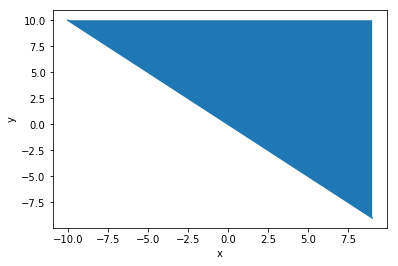

In [12]:
import matplotlib.pyplot as plt

x=range(-10,10)
y=[-i for i in x]
up=[10]*len(x)

plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y)

plt.fill_between(x,y,up)
plt.show()

蓝色区域的点标记为$+1$,白色区域的点标记为$-1$

(b)这题没有说维度，我们先考虑一维的情形，假设有$N$个点
$$
x_1\le x_2 \le...\le x_N
$$
由单调函数的定义我们知道，如果$h(x_k)<0,h(x_{k+1})>0$，那么
$$
h(x_i)<0(i=1,2...k)\\
h(x_i)>0(i=k+1,...N)
$$
因此对于一维的情形，相当于一刀切，左边为$-1$，右边为$+1$，因此一共有$m_{\mathcal{H}}(N)=N+1$

但是对于二维及以上情形就完全不一样了，我们如提示中这样构造点，先随意取一个点$x_1$，接着取第二个点$x_2$，使得$x_2$的第一个分量比$x_1$的第一个分量大，但是第二个分量比$x_1$的第二个分量小，换句话说，我们不让$x_2$大于$x1$，也不让$x_2$小于$x_1$，用同样的方式可以构造$x_3...x_N$，使得这$N$的点任意两个点是无序的，对于这样$N$个点，我们可以shatter 他们，因为此时$h(x_i)$和$h(x_j)$的关系没有限制。所以对于二维及以上情形$m_H(N)=2^N$

#### Problem 2.16 (Page 72)

In this problem , we will consider $\mathcal{X} = \mathcal{R} $.That is, x=$x$ is a one dimensional variable. For a hypothesis set prove that the VC dimension of $\mathcal{H}$ is exactly $(D + 1)$ by showing that 
$$
\mathcal{H}=\{h_c|h_c(x)=sign(\sum_{i=0}^Dc_ix^i)\}
$$
(a) There are $(D + 1)$ points which are shattered by $\mathcal{H}$. 

(b) There are no $(D + 2)$ points which are shattered by $\mathcal{H}$.    

这题和Exercise 2.4基本一样，所以做法也差不多。

(a)记$y_j=\sum_{i=0}^Dc_ix_j^i$，现在取$D+1$个点，$x_1,x_2...x_{D+1},x_j=j$

那么
$$
\left(\begin{matrix}
y_1\\
y_2\\
...\\
y_{D+1}
\end{matrix}
\right)
=
\left(
\begin{matrix}
\sum_{i=0}^Dc_ix_1^i\\
\sum_{i=0}^Dc_ix_2^i\\
...\\
\sum_{i=0}^Dc_ix_{D+1}^i
\end{matrix}
\right)
=
\left(
\begin{matrix}
1&1&1&...&1\\
1&2&2^2&...&2^{D}\\
1&3&3^2&...&3^{D}\\
...&...&...&...&...&\\
1&(D+1)&(D+1)^2&...&(D+1)^D
\end{matrix}
\right)
\times
\left(
\begin{matrix}
c_0\\
c_1\\
...\\
c_D
\end{matrix}
\right)\\
$$
我们知道
$$
\left(
\begin{matrix}
1&1&1&...&1\\
1&2&2^2&...&2^{D}\\
1&3&3^2&...&3^{D}\\
...&...&...&...&...&\\
1&(D+1)&(D+1)^2&...&(D+1)^D
\end{matrix}
\right)对应的行列式为范德蒙行列式，不为0
$$
那么对任意的$y=(y_1,y_2,...,y_{D+1})^T$
$$
\left(
\begin{matrix}
1&1&1&...&1\\
1&2&2^2&...&2^{D}\\
1&3&3^2&...&3^{D}\\
...&...&...&...&...&\\
1&(D+1)&(D+1)^2&...&(D+1)^D
\end{matrix}
\right)
\times
\left(
\begin{matrix}
c_0\\
c_1\\
...\\
c_D
\end{matrix}
\right)
=
\left(\begin{matrix}
y_1\\
y_2\\
...\\
y_{D+1}
\end{matrix}
\right)
$$
关于$c=(c_0,c_1,...c_D)^T$有解，因此存在$D+1$个点可以被shatter

(b)记$z_j=(1,x_j,x_j^2...x_j^{D})\in R^{D+1}$，那么现在任取$D+2$个点$x_1,x_2...x_{D+2}$，对应可以得到$z_1,z_2...z_{D+2}$。$R^{D+1}$空间任意$D+2$个点必然线性相关，所以不妨设$z_{D+2}$可以被线性表出，注意$c=(c_0,c_1,...c_D)^T$
$$
z_{D+2}=\sum_{i=1}^{D+1}k_iz_i\\
c^Tz_{D+2}=\sum_{i=1}^{D+1}c^Tk_iz_i\\
sign(c^Tz_{D+2})=sign(\sum_{i=1}^{D+1}k_ic^Tz_i)
$$
也就是说$z_{D+2}$的分类被$z_1,z_2...z_{D+1}$确定，那么
$(sign(z_1),sign(z_2)...sign(z_{D+1}),-sign(z_{D+2}))$这种情形必然无法被划分出来，因此$d_{vc}\le D+1$

结合(a),(b)我们可得
$$
d_{vc}=D+1
$$
回顾书上的说明，$d_{vc}$可以理解为自由分量的个数，对于$D$次多项式，显然有$D+1$个自由分量。

#### Problem 2.17 (Page 72) 

The VC dimension depends on the input space as well as $\mathcal{H}$. For a fixed $\mathcal{H}$, consider two input spaces $\mathcal{X_1} \subseteq \mathcal{X_2} $. Show that the VC dimension of $\mathcal{H}$ with respect to input space $\mathcal{X_1}$ is at most the VC dimension of $\mathcal{H}$ with respect to input space $\mathcal{X_2}$. 

How can the result of this problem be used to answer part (b) in Problem 2.16? [Hint: How is Problem 2.16 related to a perceptron in D dimensions?}    

反正法，假设$d_1=d_{vc}(\mathcal{X1},\mathcal{H})> d_{vc}(\mathcal{X2},\mathcal{H})=d_2$。那么在$\mathcal{X_1}$中必然有$d_1$个点可以被shatter，由$\mathcal{X_1} \subseteq \mathcal{X_2} $我们知道这$d_1$个点也在$\mathcal{X_2}$中，因为假设空间均为$\mathcal{H}$，我们知道$\mathcal{X_2}$中这$d_1$个点也可以被shatter，这就与$d_1=d_{vc}(\mathcal{X1},\mathcal{H})> d_{vc}(\mathcal{X2},\mathcal{H})=d_2$矛盾。因此$d_{vc}(\mathcal{X1},\mathcal{H})\le d_{vc}(\mathcal{X2},\mathcal{H})$

回到上题的(b)部分，我们知道$z_j=(1,x_j,x_j^2...x_j^{D})\in R^{D+1}$，所以整个输入空间的集合构成了整个$R^{D+1}$的子集，而我们知道维度为$D+1$的感知机的VC dimension 为D+1，因此$d_{vc}\le D+1$。

#### Problem 2.18 (Page 72)

The VC dimension of the perceptron hypothesis set corresponds to the number of parameters $(w_0, w_1 , ..., w_d)$ of the set, and this observation is ' usually' true for other hypothesis sets. However, we will present a counter example here. Prove that the following hypothesis set for $x\in R$ has an infinite VC dimension : 
$$
\mathcal{H}=\{h_{\alpha}|h_{\alpha}=(-1)^{\lfloor \alpha x \rfloor},where\  {\alpha}\in R,
$$
 where $\lfloor A\rfloor$is the biggest integer $ \le A$ (the floor function). This hypothesis has only one parameter $\alpha$ but 'enjoys' an infinite VC dimension. [Hint: Consider $x_1 , . . . , x_N$, where $x_n =10^n$ , and show how to implement an arbitrary dichotomy $y_1, . . . , y_N$ .]

由感知机模型的例子我们似乎可以得出VC dimension和变量的自由分量有关，这题就给出一个反例，只有一个参数，但是VC dimension是无穷大。

首先对$N$维说明这个事情，任取$(y_1,...,y_N)\in \{-1,+1\}^N$，我们构造这样一个$z=(z_1,...,z_N)$，使得
$$
当y_i=+1时，z_i=0
\\ 当y_i=-1时，z_i=1
\\简单来说，就是(-1)^{z_i}=y_i
$$
现在取
$$
\alpha=0.z_1z_2...z_N\\
x=(x_1 , . . . , x_N), x_n =10^n
$$
那么
$$
\begin{aligned}
h_{\alpha}(x_i)&=(-1)^{\lfloor \alpha x_i \rfloor}
\\&=(-1)^{\lfloor{0.z_1z_2...z_N\times10^n}\rfloor}
\\&=(-1)^{z_1z_2...z_n}
\\&=(-1)^{z_n}
\\&=y_n(回顾之前的结论)
\end{aligned}
$$
所以任意$x=(x_1 , . . . , x_N)$均可以被shatter。从上面的结论我们推出
$$
对任意x=(x_1,...x_N,...)\in R^{\infty}，y=(y_1,...,y_N,...)\in \{-1,+1\}^{\infty}\\
存在z=(z_1,...,z_N,...)\in \{0,1\}^{\infty}.其中(-1)^{z_i}=y_i
$$
因此$\mathcal{H}$的VC dimension为无穷大。

#### Problem 2.19 (Page 72)

This problem derives a bound for the VC dimension of a complex hypothesis set that is built from simpler hypothesis sets via composition. Let $\mathcal{H_1},...,\mathcal{H_k}$ be hypothesis sets with VC dimension $d_1, . . . , d_K$ . Fix $h_1 , . . . , h_k$ , where $h_i \in \mathcal{H_i} $. Define a vector $z$ obtained from $x$ to have components $h_i (x) $. Note that $x \in R^d$, but z $z\in \{-1, +1\}^K$ . Let $\tilde{  \mathcal H}$ be a hypothesis set of functions that take inputs in $R^K$ . So 
$$
\tilde{h}\in\tilde{\mathcal{H}}:z\in R^K \mapsto \{+1,-1\}
$$
and suppose that $\tilde{\mathcal{H}}​$ has VC dimension $\tilde{d} ​$.    
We can apply a hypothesis in $\tilde{\mathcal{H}}$ to the $z$ constructed from $(h_1 , . . . , h_K)$ . This is the composition of the hypothesis set $\tilde{\mathcal{H}}$ with $(\mathcal{H_1},...,\mathcal{H_k})$ . More formally, the composed hypothesis set $H=\tilde{\mathcal{H}}\circ (\mathcal{H_1},...,\mathcal{H_k})$ is defined by $h\in \mathcal{H}$ if 
$$
h(x) = \tilde{h}(h_1(x) , . . . , h_K (x) ) ,\tilde{h}\in\tilde{\mathcal{H}};h_i\in\mathcal{H_i}
$$
(a) Show that
$$
m_H(N)\le m_\tilde{H}(N) \prod _{i=1}^{K}m_{\mathcal{H_i}} (N) .	 (2. 18)
$$
[Hint: Fix $N​$ points $x_1 , . . . , x_N​$ and fix $h_1, . . . , h_K​$ . This generates N transformed points $z_1 , . . . , z_N​$ . These $z_1, . . . , z_N​$ can be dichotomized in at most $m_\tilde{\mathcal{h}}(N)​$ ways, hence for fixed $(h_1 , . . . , h_k), (x_1 , . . . , x_N)​$ can be dichotomized in at most $m_\tilde{\mathcal{H}}(N)​$ ways. Through the eyes of $x_1 , . . . , x_N​$, at most how many hypotheses are there (eﬀectively) in $\mathcal{H_i}​$? Use this bound to bound the effective number of K-tuples $(h_1, . . . , h_K)​$ that need to be considered. Finally, argue that you can bound the number of dichotomies that can be implemented by the product of the number of possible K-tuples $(h_1, . . . , h_K)​$ and the number of dichotomies per K-tuple.]

(b) Use the bound $m(N)\le(\frac{eN}{d_{vc}})^{d_{vc}}$ to get a bound for $m_H(N) $in terms of $\tilde{d}, d_1, . . . , d_K$ . 

(c) Let $D = \tilde{d}+ \sum _{i=1}^{K}d_i $, and assume that $D > 2e log_2 D$. Show that 
$$
d_{vc}(\mathcal{H})\le 2Dlog_2D.
$$
(d) If $\mathcal{H_i}​$ and $\tilde{H}​$ are all perceptron hypothesis sets, show that 
$$
d_{vc} (\mathcal{H}) = O(dK log(dK)).
$$
In the next chapter, we will further develop the simple linear model. This linear model is the building block of many other models, such as neural networks. The results of this problem show how to bound the VC dimension of the more complex models built in this manner.  

这题希望解释的是复合函数的VC dimension以及$m_{\mathcal{H}}(N)$，下面分别看一下

(a)我们根据提示里一步步来。

首先对于固定的$N$个点 $x_1 , . . . , x_N$和固定的 $h_1, . . . , h_K$，我们可以得到$N$个转换后的点$z_1 , . . . , z_N$，那么对于这$N$个点和假设$\tilde{\mathcal{H}}$，最多可以可以表示$m_\tilde{H}(N)$种组合。因此对于固定的$(x_1 , . . . , x_N)$和$(h_1, . . . , h_K)$最多可以表示$m_\tilde{H}(N)$种组合，所以接下来只要看$(h_1, . . . , h_K)$可以表示出多少种有效的组合，这部分可以用数学公式写下来：
$$
m_H(N)\le m_\tilde{h}(N)((h_1, . . . , h_K)最多可以表示的组合数量)
$$
我们还是用之前类似的思路考虑，对于固定的$h_2,h_3,...,h_K$，$(h_1(x_1),h_1(x_2),...,h_1(x_N))$最多可以表示出$m_{\mathcal{H_1}}(N)$种组合，同理对于任意$h_i$，固定其他的$h_j(i\neq j)$，最多可以表示出$m_{\mathcal{\mathcal{H}_i}}$种组合，因此由乘法原理可得：
$$
m_H(N)\le m_\tilde{H}(N) \prod _{i=1}^{K}m_{\mathcal{H_i}} (N)
$$
(b)这个就比较简单了，题目中的不等式可以查看Problem 2.6。由$m(N)\le(\frac{eN}{d_{vc}})^{d_{vc}}$，我们可得:
$$
\begin{aligned}
m_H(N)&\le m_\tilde{H}(N) \prod _{i=1}^{K}m_{\mathcal{H_i}} (N) 
\\&\le (\frac{eN}{\tilde d})^{\tilde d} \prod _{i=1}^{K}(\frac{eN}{d_i})^{d_i}
\\&= \frac{(eN)^{\tilde d+\sum_{i=1}^Kd_i}}{{\tilde d}^{\tilde d}\prod_{i=1}^Kd_i^{d_i}}
\end{aligned}
$$
(c)只要证明
$$
当N=2Dlog_2D时，m(N)<2^N即可
$$
由上题我们知道
$$
m_H(N)\le  \frac{(eN)^{\tilde d+\sum_{i=1}^Kd_i}}{{\tilde d}^{\tilde d}\prod_{i=1}^Kd_i^{d_i}}=\frac{(eN)^D}{{\tilde d}^{\tilde d}\prod_{i=1}^Kd_i^{d_i}}=\frac{(eN)^D}{e^{\tilde d ln(\tilde d)+\sum_{i=1}^Kd_iln(d_i)}}
$$
下面对分母${e^{\tilde d ln(\tilde d)+\sum_{i=1}^Kd_iln(d_i)}}$进行估计，首先介绍**琴生不等式（Jensen's inequality）**
$$
若f(x)是下凸函数(f^{''}(x)\ge0),那么对于任意\lambda_1+\lambda_2+...+\lambda_n=1(\lambda_i\ge0)有
\\\sum_{i=1}^n \lambda_if(x_i)\ge f(\sum_{i=1}^n\lambda_i x_i)
\\特别的，取\lambda_i=\frac 1 n时可得
\\ \frac{\sum_{i=1}^nf(x_i)}{n}\ge f(\frac {\sum_{i=1}^n x_i}n)
$$
回到原题，我们令$f(x)=xlnx$，那么
$$
\begin{aligned}
f^{'}(x)=lnx+1\\
f^{''}(x)=\frac 1 x>0
\end{aligned}
$$
因此$f(x)$是下凸函数，现在令$\tilde d=d_{K+1}$，通过变形以及琴生不等式可得
$$
\begin{aligned}
{e^{\tilde d ln(\tilde d)+\sum_{i=1}^Kd_iln(d_i)}}&=e^{\sum _{i=1}^{K+1}d_iln(d_i)}
\\&=e^{\sum _{i=1}^{K+1}f(d_i)}
\\&\ge e^{(K+1)f(\frac {\sum_{i=1}^{K+1}d_i}{K+1})}(这一步是由琴生不等式)
\\&=e^{(K+1)f(\frac {D}{K+1})}(注意D = \tilde{d}+ \sum _{i=1}^{K}d_i = \sum _{i=1}^{K+1}d_i)
\\&=e^{(K+1)\times \frac {D}{K+1}ln(\frac {D}{K+1})}
\\&=e^{Dln(\frac {D}{K+1})}
\\&=(\frac {D}{K+1})^D
\end{aligned}
$$
因此
$$
m_H(N)\le \frac{(eN)^D}{e^{\tilde d ln(\tilde d)+\sum_{i=1}^Kd_iln(d_i)}}\le\frac{(eN)^D}{(\frac {D}{K+1})^D}
$$
现在取$N=2Dlog_2D$，那么上述不等式右边可以化为
$$
\frac{(eN)^D}{(\frac {D}{K+1})^D}=\frac{(e2Dlog_2D)^D}{(\frac {D}{K+1})^D}={(2elog_2D)^D}{(K+1)^D}(这一步是约去分子分母的D^D)
$$
回顾题目中的假设$D > 2e log_2 D$，以及一个比较显然但是容易忽略的结论
$$
D = \tilde{d}+ \sum _{i=1}^{K}d_i\ge K+1
$$
注意$N=2Dlog_2D$，那么带入上式可得
$$
m_H(2Dlog_2D)=m_H(N)\le\frac{(eN)^D}{(\frac {D}{K+1})^D}<D^DD^D=D^{2D}=2^{2Dlog_2D}
$$
因此当$N=2Dlog_2D$时，$m_H(N)<2^N$，所以
$$
d_{vc}(\mathcal{H})\le 2Dlog_2D.
$$
这题总体来说还是有一定难度的，比较难的一点是琴生不等式如果使用的少那么那步不等式放缩可能会做不出来。

(d)结合(c)来考虑这题，对于$R^n$中的感知机模型，我们知道它的VC dimension为$n+1$，这题中$(\mathcal{H_1},...,\mathcal{H_k})$为$R^d$中的感知机，$\tilde{\mathcal{H}}$为$R^K$中的感知机，因此
$$
\begin{aligned}
D& = \tilde{d}+ \sum _{i=1}^{K}di 
\\&=K+1+ \sum _{i=1}^{K}(d+1)
\\&=Kd+K+K+1
\\&=Kd+2K+1
\end{aligned}
$$
带入(c)中可得
$$
d_{vc}(\mathcal{H})\le 2Dlog_2D=2(Kd+2K+1)log_2(Kd+2K+1)
$$
因此$d_{vc}= O(dK log(dK))$

可能有人会说(c)需要$D > 2e log_2 D$，这个不等式左边是一次式，右边是对数式，所以只有$D$取个稍微大点的数，例如32，这个不等式就必然成立。由$D = \tilde{d}+ \sum _{i=1}^{K}d_i $可得$D\ge K+1$，所主要$K$稍大一些变能满足不等式了。

总结一下，我认为这题的非常好，这个对于复合函数的VC dimension估计实际上非常好的解释了有些特征转换后的模型为什么可以shatter维度非常高的数据，从数学角度证明了看起来显然的事情。

#### Problem 2.20 (Page 73)

There are a number of bounds on the generalization error $\epsilon$ ,all holding with probability at least $1 - \delta$. 

(a) Original VC-bound: 
$$
\epsilon\le \sqrt{\frac 8 Nln{\frac {4m_H(2N)}\delta}}
$$
(b) Rademacher Penalty Bound:    
$$
\epsilon\le \sqrt{{\frac {2ln(2Nm_H(N))}N}}+\sqrt {\frac 2Nln{\frac 1 \delta}}+\frac 1N
$$
(c) Parrondo and Van den Broek: 
$$
\epsilon\le \sqrt{{\frac 1N}(2\epsilon+ln{\frac {6m_H(2N)}\delta})}
$$
(d) Devroye: 
$$
\epsilon\le \sqrt{{\frac 1{2N}}(4\epsilon(1+\epsilon)+ln{\frac {4m_H(N^2)}\delta})}
$$
​Note that (c) and (d) are implicit bounds in $\epsilon$. Fix $d_{vc} = 50$ and $ \delta = 0.05$ and plot these bounds as a function of N. Which is best? 

这题就是按照公式估计上界并作图，注意${m}_\mathcal{H }(N) \le \sum_{i=0}^{d_{vc}}\binom{N}{i} $

但(c),(d)左右两边都有$\epsilon$，应该要处理一下。

先看(c)，令$a=\frac 1 N,b=ln{\frac {6m_H(2N)}\delta}$，那么不等式可以化为
$$
\epsilon\le \sqrt{2a\epsilon+ab}
\\两边平方可得
\\\epsilon^2\le2a\epsilon+ab
\\(\epsilon-a)^2\le ab+a^2
\\ -\sqrt{ab+a^2}\le \epsilon-a\le\sqrt{ab+a^2}
\\a-\sqrt{ab+a^2}\le \epsilon\le a+\sqrt{ab+a^2}
\\这里只要考虑上界
\\\epsilon\le a+\sqrt{ab+a^2}
\\将a=\frac 1 N,b=ln{\frac {6m_H(2N)}\delta}带入可得
\\\epsilon\le \frac1N+\sqrt{\frac{1}{N^2}+\frac{1}{N}ln{\frac {6m_H(2N)}\delta}}
$$
对于(d)，令$a=\frac 1 {2N},b=ln{\frac {4m_H(N^2)}\delta}$，那么不等式可以化为
$$
\epsilon\le \sqrt{a(4\epsilon(1+\epsilon)+b)}
\\两边平方可得
\\\epsilon^2\le4a\epsilon(1+\epsilon)+ab
\\(1-4a)\epsilon^2-4a\epsilon\le ab
\\注意这里我们只要考虑N很大的情形，所以1-4a=1-\frac 2N>0
\\(1-4a)(\epsilon-\frac {2a}{1-4a})^2\le ab+\frac{4a^2}{1-4a}
\\(\epsilon-\frac {2a}{1-4a})^2\le\frac{ab+\frac{4a^2}{1-4a}}{1-4a}
\\ -\sqrt{\frac{ab+\frac{4a^2}{1-4a}}{1-4a}}\le\epsilon-\frac {2a}{1-4a}\le\sqrt{\frac{ab+\frac{4a^2}{1-4a}}{1-4a}}
\\这里只要考虑上界，因此
\\ \epsilon\le \sqrt{\frac{ab+\frac{4a^2}{1-4a}}{1-4a}}+\frac {2a}{1-4a}
=\sqrt{\frac{ab}{1-4a}+\frac{4a^2}{(1-4a)^2}}+\frac {2a}{1-4a}
\\将a=\frac 1 {2N},b=ln{\frac {4m_H(N^2)}\delta}带入可得
\\ \epsilon\le \sqrt{\frac{ln{\frac {4m_H(N^2)}\delta}}{2(N-2)}+\frac{1}{(N-2)^2}}+\frac{1}{N-2}
$$

In [5]:
from scipy.special import comb
from math import log
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

dvc=50
delta=0.05

#计算m(N)
def m(n):
    k=min(dvc,n)
    s=0
    for i in range(k+1):
        s+=comb(n,k)
    return s

#Original VC-bound
def f1(n):
    result=(8/n)*log(4*m(2*n)/delta)
    result=result**0.5
    return result

#Rademacher Penalty Bound
def f2(n):
    k1=(2*log(2*n*m(n))/n)
    k2=(2/n)*log(1/delta)
    k3=1/n
    result=k1**0.5+k2**0.5+k3
    return result

#Parrondo and Van den Broek
def f3(n):
    k1=1/n
    k2=1/(n**2)+(1/n)*log(6*m(2*n)/delta)
    k2=k2**0.5
    result=k1+k2
    return result

#Devroye
def f4(n):
    k1=1/((n-2)**2)
    k2=log(4*m(n**2)/delta)/(2*(n-2))+1/(n-2)
    k2=k2**0.5
    result=k1+k2
    return result

In [6]:
#产生点集
import numpy as np
x=np.arange(1000,10001,1000)

y1=[f1(i) for i in x]
y2=[f2(i) for i in x]
y3=[f3(i) for i in x]
y4=[f4(i) for i in x]

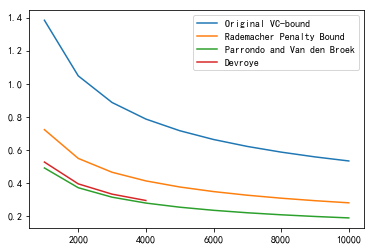

In [7]:
plt.plot(x,y1,label="Original VC-bound")
plt.plot(x,y2,label="Rademacher Penalty Bound")
plt.plot(x,y3,label="Parrondo and Van den Broek")
plt.plot(x,y4,label="Devroye")
plt.legend()
plt.show()

这里发现Devroye有一部分图像没了，看下原因

In [8]:
y4

[0.52617484593182073,
 0.39450898728341854,
 0.33239411668265501,
 0.29402105801720696,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

$m_\mathcal{H}(N)$溢出了，所以可能要计算$ln(m_\mathcal{H}(N))$，但之前的式子其实不方便取对数，所以这里采取了Problem 2.6的结论
$$
m_\mathcal{H}(N)\le (\frac {eN}{d_{vc}} )^{d_{vc}}
\\ln(m_\mathcal{H}(N))\le d_{vc}(1+ln(N)-ln(d_{vc}))
$$
接着重新计算一下

In [9]:
from scipy.special import comb
from math import log
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

dvc=50
delta=0.05

#计算m(N)
def lnm(n):
    s=dvc*(1+log(n)-log(dvc))
    return s

#Original VC-bound
def f1(n):
    result=(8/n)*(log(4/delta)+lnm(2*n))
    result=result**0.5
    return result

#Rademacher Penalty Bound
def f2(n):
    k1=(2/n)*(log(2*n)+lnm(n))
    k2=(2/n)*log(1/delta)
    k3=1/n
    result=k1**0.5+k2**0.5+k3
    return result

#Parrondo and Van den Broek
def f3(n):
    k1=1/n
    k2=1/(n**2)+(1/n)*(log(6/delta)+lnm(2*n))
    k2=k2**0.5
    result=k1+k2
    return result

#Devroye
def f4(n):
    k1=1/((n-2)**2)
    k2=(log(4/delta)+lnm(n**2))/(2*(n-2))+1/(n-2)
    k2=k2**0.5
    result=k1+k2
    return result

In [10]:
#产生点集
import numpy as np
x=np.arange(1000,30001,1000)

y1=[f1(i) for i in x]
y2=[f2(i) for i in x]
y3=[f3(i) for i in x]
y4=[f4(i) for i in x]

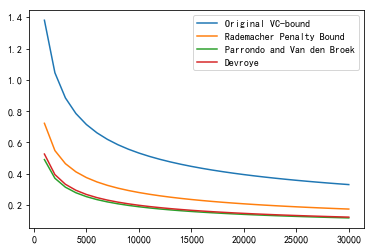

In [11]:
plt.plot(x,y1,label="Original VC-bound")
plt.plot(x,y2,label="Rademacher Penalty Bound")
plt.plot(x,y3,label="Parrondo and Van den Broek")
plt.plot(x,y4,label="Devroye")
plt.legend()
plt.show()

看下两个比较接近的上界

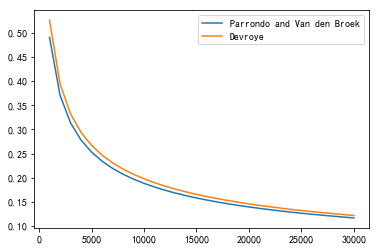

In [12]:
plt.plot(x,y3,label="Parrondo and Van den Broek")
plt.plot(x,y4,label="Devroye")
plt.legend()
plt.show()

在台大那门课里，老师希望我们使用$m_\mathcal{H}(N)$的上界为$N^{d_{vc}}$，因此
$$
\\ln(m_\mathcal{H}(N))\le d_{vc}ln(N)
$$
我们来看下效果

In [13]:
from scipy.special import comb
from math import log
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

dvc=50
delta=0.05

#计算m(N)
def lnm(n):
    s=dvc*log(n)
    return s

#Original VC-bound
def f1(n):
    result=(8/n)*(log(4/delta)+lnm(2*n))
    result=result**0.5
    return result

#Rademacher Penalty Bound
def f2(n):
    k1=(2/n)*(log(2*n)+lnm(n))
    k2=(2/n)*log(1/delta)
    k3=1/n
    result=k1**0.5+k2**0.5+k3
    return result

#Parrondo and Van den Broek
def f3(n):
    k1=1/n
    k2=1/(n**2)+(1/n)*(log(6/delta)+lnm(2*n))
    k2=k2**0.5
    result=k1+k2
    return result

#Devroye
def f4(n):
    k1=1/((n-2)**2)
    k2=(log(4/delta)+lnm(n**2))/(2*(n-2))+1/(n-2)
    k2=k2**0.5
    result=k1+k2
    return result

In [14]:
#产生点集
import numpy as np
x=np.arange(1000,30001,1000)

y1=[f1(i) for i in x]
y2=[f2(i) for i in x]
y3=[f3(i) for i in x]
y4=[f4(i) for i in x]

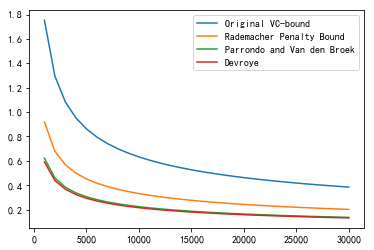

In [15]:
plt.plot(x,y1,label="Original VC-bound")
plt.plot(x,y2,label="Rademacher Penalty Bound")
plt.plot(x,y3,label="Parrondo and Van den Broek")
plt.plot(x,y4,label="Devroye")
plt.legend()
plt.show()

看下这两个比较接近的两个上界

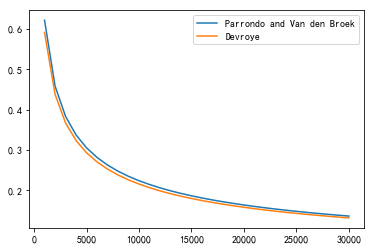

In [16]:
plt.plot(x,y3,label="Parrondo and Van den Broek")
plt.plot(x,y4,label="Devroye")
plt.legend()
plt.show()

和之前的图稍有不同，这是因为上界取的不同的缘故所致。

#### Problem 2.21 (Page 74)

Assume the following theorem to hold 

Theorem
$$
P[\frac{E_{out}(g)-E_{in}(g)}{\sqrt {E_{out}(g)}}>\epsilon]\le c.m_{\mathcal{H}}(2N)exp(-\frac{{\epsilon}^2N}4)
$$
where c is a constant that is a little bigger than 6. 

This bound is useful because sometimes what we care about is not the absolute generalization error but instead a relative generalization error (one can imagine that a generalization error of 0.01 is more significant when $E_{out} = 0.01$ than when $E_{out} = 0.5$). Convert this to a generalization bound by showing that with probability at least $1 - \delta$, 
$$
E_{out} (g ) \le E_{in}( g) + \frac{\xi}2\left [1+ \sqrt{1+\frac{4E_{in}(g)}{\xi}}\ \right]
$$
where $\xi=\frac{4}{N}log{\frac{c.m_{\mathcal H}(2N)}{\delta}}​$.  

由题目中给出的不等式我们知道
$$
\frac{E_{out}(g)-E_{in}(g)}{\sqrt {E_{out}(g)}}\le \epsilon的概率大于等于1-c.m_{\mathcal{H}}(2N)exp(-\frac{{\epsilon}^2N}4)
$$
现在要证明的结论中的概率为$1-\delta​$，因此我们令$\delta=c.m_{\mathcal{H}}(2N)exp(-\frac{{\epsilon}^2N}4)​$

，对此式化简可得
$$
ln\frac{\delta}{cm_{\mathcal H}(2N)}=-\frac{{\epsilon}^2N}4
\\-\frac 4N ln\frac{\delta}{cm_{\mathcal H}(2N)}={\epsilon}^2
\\我们令\xi={\epsilon}^2=\frac 4Nln\frac{cm_{\mathcal H}(2N)}{\delta}
$$
因此我们现在有
$$
\frac{E_{out}(g)-E_{in}(g)}{\sqrt {E_{out}(g)}}\le \epsilon的概率大于等于1-\delta
\\\xi={\epsilon}^2=\frac 4Nln\frac{cm_{\mathcal H}(2N)}{\delta}
\\\delta=c.m_{\mathcal{H}}(2N)exp(-\frac{{\epsilon}^2N}4)
$$
为了更接近我们的结论，现在要对$\frac{E_{out}(g)-E_{in}(g)}{\sqrt {E_{out}(g)}}\le \epsilon$处理
$$
\frac{E_{out}(g)-E_{in}(g)}{\sqrt {E_{out}(g)}}\le \epsilon
\\{E_{out}(g)-E_{in}(g)}\le \epsilon{\sqrt {E_{out}(g)}}
\\配方可得
\\{E_{out}(g)- \epsilon{\sqrt {E_{out}(g)}}\le E_{in}(g)}
\\{E_{out}(g)- \epsilon{\sqrt {E_{out}(g)}}+\frac{\epsilon^2}{4}\le E_{in}(g)}+\frac{\epsilon^2}{4}
\\({\sqrt {E_{out}(g)}}-\frac{\epsilon}2)^2\le E_{in}(g)+\frac{\epsilon^2}{4}
\\-\sqrt{E_{in}(g)+\frac{\epsilon^2}{4}}\le \sqrt{E_{out}(g)}-\frac{\epsilon}2\le\sqrt{E_{in}(g)+\frac{\epsilon^2}{4}}
\\  \frac{\epsilon}2-\sqrt{E_{in}(g)+\frac{\epsilon^2}{4}}\le  \sqrt{E_{out}(g)}\le \frac{\epsilon}2+\sqrt{E_{in}(g)+\frac{\epsilon^2}{4}}
\\注意到\frac{\epsilon}2-\sqrt{E_{in}(g)+\frac{\epsilon^2}{4}}\le0，所以这部分没什么意义，只需考虑右边的不等式
\\ \sqrt{E_{out}(g)}\le \frac{\epsilon}2+\sqrt{E_{in}(g)+\frac{\epsilon^2}{4}}
\\两边平方可得
\\E_{out}(g)
\le \left(\frac{\epsilon}2+\sqrt{E_{in}(g)+\frac{\epsilon^2}{4}}\right)^2
=\frac{{\epsilon}^2} {4}+E_{in}(g)+\frac{\epsilon^2}{4}+\epsilon\left (\sqrt{E_{in}(g)+\frac{\epsilon^2}{4}}\right)
\\E_{out}(g)
\le \frac{{\epsilon}^2} {2}+E_{in}(g)+\frac{{\epsilon}^2}2\sqrt{1+\frac{4E_{in}(g)}{{\epsilon}^2}}
\\现在将\xi={\epsilon}^2带入可得
\\E_{out}(g)
\le \frac \xi 2+E_{in}(g)+\frac{\xi}2\sqrt{1+\frac{4E_{in}(g)}{\xi}}
= E_{in}( g) + \frac{\xi}2\left [1+ \sqrt{1+\frac{4E_{in}(g)}{\xi}}\ \right]
$$
因此结论成立。其实这题就是纯粹计算，没什么技巧性。

#### Problem 2.22 (Page 74)

When there is noise in the data , $E_{out} (g^{(D)}) = E_{x,y} [(g^{(D)} (x) - y(x))^2] $, where $y(x) = f(x) + \epsilon$. If $\epsilon$ is a zero mean noise random variable with variance $\delta^2$ , show that the bias variance decomposition becomes 
$$
E_D[E_{out} (g^{(D)})] = \delta^2 + bias + var.
$$

方差和偏差的公式可以查看课本63页，这里我们直接计算。
$$
\begin{aligned}
E_D[E_{out} (g^{(D)})] &=E_D\left [E_{x,y} [(g^{(D)} (x) - y(x))^2]\right ]
\\&=E_D\left [E_{x} [(g^{(D)} (x) -f(x) - \epsilon )^2]\right ]
\\&=E_D\left [E_{x} [(g^{(D)} (x) -f(x))^2]+E_{x}(\epsilon^2)-2 E_{x}[ \epsilon(g^{(D)} (x) -f(x))] \right ]
\end{aligned}
$$
我们分别看下上述三项，首先看第一项
$$
\begin{aligned}
E_D\left [E_{x} [(g^{(D)} (x) -f(x))^2]\right]&=E_D\left [E_{x} [(g^{(D)} (x) -f(x))^2]\right](这一步使用由于g^{(D)} (x) -f(x)没有关于y的项)
\\&=E_x\left [E_{D} [(g^{(D)} (x) -f(x))^2]\right]
\\&=bias+var(这一步可以参考课本63页)
\end{aligned}
$$
再来看下第二项，注意$\epsilon$数学期望为0，方差为$\delta^2$
$$
E_D\left [E_{x}(\epsilon^2) \right ]=E_D\left [E_{x}(\epsilon^2) \right ]=E_D(\delta^2)=\delta^2
$$
最后来看下第三项，注意$\epsilon$数学期望为0
$$
E_D\left [-2 E_{x}[ \epsilon(g^{(D)} (x) -f(x))] \right ]=E_D\left [-2E_x(\epsilon)E_x[g^{(D)} (x) -f(x)]\right ]=0
$$
集合上述三点可得
$$
E_D[E_{out} (g^{(D)})] = \delta^2 + bias + var.
$$

#### Problem 2.23 (Page 74)

Consider the learning problem in Example 2.8, where the input space is $\mathcal X = [-1, +1] $, the target function is $f(x) = sin(\pi x) $, and the input probability distribution is unifrm on $\mathcal X$. Assume that the training set $D$ has only two data points (picked independently), and that the learning algorithm picks the hypothesis that minimizes the in sample mean squared error. In this problem, we will dig deeper into this case.    

For each of the following learning models, find (analytically or numerically) (i) the best hypothesis that approximates $f$ in the mean squared error sense (assume that $f $ is known for this part) , (ii) the expected value (with respect to $D$) of the hypothesis that the learning algorithm produces, and (iii) the expected out of sample error and its bias and var components. 

(a) The learning model consists of all hypotheses of the form $h(x) = ax + b $(if you need to deal with the infinitesimal probability case of two identical data points, choose the hypothesis tangential to $f$). 

(b) The learning model consists of all hypotheses of the form $h(x) = ax$. This case was not covered in Example 2.8 . 

(c) The learning model consists of all hypotheses of the form $h(x) = b$. 

这题我的理解是这样的：

(i)先根据两个样本求一下三种模型的在平方误差下的最优解。

(ii)学习算法产生的假设的数学期望，也就是课本63页中的$E_{out}(g^{(D)})=E_x \left [(g^{(D)}(x)-f(x))^2\right]$。这部分要用编程模拟，直接求的话感觉不大可行。

(iii)(ii)已经求出$E_{out}(g^{(D)})$,只要求$var,bias$

下面分别做一下，这里统一假设两个样本点为$(x_1,y_1),(x_2,y_2),y_i=sin(\pi x_i)$

(a)

(i)平方误差$S_1=(ax_1+b-y_1)^2+(ax_2+b-y_2)^2$，这个实际上就是一元线性回归的特殊情形，这里直接套公式了
$$
\\使得\sum_{i=1}^n(ax_i+b-y_i)^2最小的a,b满足
\\\tilde{a}=\frac {l_{xy}}{l_{xx}}
\\ \tilde{b}=\overline{y}-\tilde{a}\overline{x}
\\其中\overline{y}=\frac{\sum_{i=1}^ny_i}n,\overline{x}=\frac{\sum_{i=1}^nx_i}n
\\l_{xx}=\sum_{i=1}^n(x_i-\overline{x})^2,l_{xy}=\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})
$$
不过由于这题是两个点，所以最好的直线实际上就是过这两个点的直线，因此
$$
y_1=ax_1+b
\\y_2=ax_2+b
\\a=\frac{y_2-y_1}{x_2-x_1}
\\b=y_1-ax_1=y_1-\frac{y_2-y_1}{x_2-x_1}x_1=\frac{y_1x_2-y_2x_1}{x_2-x_1}
$$
后续部分也会采用这个公式

(ii)这部分采用编程模拟,我们先画个图看一下,第一步先把点构造出来

In [111]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

def f(x):
    return math.sin(math.pi*x)

#已知(x1,y1),(x2,y2)过直线y=kx+b，此函数返回k,b
def treat(x1,x2):
    y1=f(x1)
    y2=f(x2)
    k=(y2-y1)/(x2-x1)
    b=(y1*x2-y2*x1)/(x2-x1)
    return k,b

#产生-1到1的20个点，对每个点，求每个点与其后面一个点连线的直线
x=np.arange(-1,1,0.05)

#求出对应的k,b
u=[]
for i in range(x.size-1):
    u.append(treat(x[i],x[i+1]))

#求出直线
X1=np.array([-1.0,1.0])
Y1=[]
for i in u:
    temp=X*i[0]+i[1]
    Y1.append(temp)

#y=sin(pix)
X2=np.arange(-1,1,0.01)
Y2=np.array([])
for i in X2:
    Y2=np.append(Y2,f(i))

作图

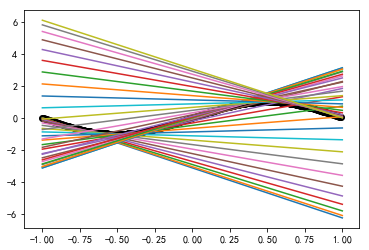

In [93]:
for i in Y1:
    plt.plot(X1,i)
plt.scatter(X2,Y2,c='BLACK')
#plt.ylim(-2.0,2.0)
#plt.xlim(-2.0,2.0)
plt.show()

In [163]:
#定义误差函数
def s1(x,x1,x2):
    y1=f(x1)
    y2=f(x2)
    #为了防止分母为0
    try:
        k=(y2-y1)/(x2-x1)
        b=(y1*x2-y2*x1)/(x2-x1)
    except:
        k=(y2-y1)/(x2-x1+10**(-6))
        b=(y1*x2-y2*x1)/(x2-x1+10**(-6))
    y=f(x)
    y1=k*x+b
    return 1/8*(y-y1)**2

from scipy import integrate
integrate.tplquad(s1, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)

(1.8829992352626945, 1.409809326862331e-10)

这里采用了scipy库来计算积分，我们看下书上65页的结果,$bias=0.21,var=1.69$，加起来为1.90，还是非常接近的，这样这部分就完成了。

(iii)查看课本63页，要计算$bias$与$var$，我们需要计算出$\overline{g}(x)$，这里我们用模拟的方式求出数值解。

In [154]:
import random

#模拟求出系数
def simulation(n):
    k=0
    b=0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1=random.uniform(-1,1)
        x2=random.uniform(-1,1)
        k1,b1=treat(x1,x2)
        k+=k1
        b+=b1
    return(k/n,b/n)

#比较下10000次以上的结果
n=range(10**4,10**5+1,10**4)
result=[]
for i in n:
    temp=simulation(i)
    print(temp)
    result.append(temp)

(0.7542004631515686, 0.004634631960119373)
(0.7932272074612549, 0.009111960322264611)
(0.7695429568430187, 0.002195554938190729)
(0.7755646547742779, 0.002358727187576683)
(0.773695809246891, 0.0008405129459178611)
(0.773953663591212, 9.874361676723804e-05)
(0.7711379169264839, -0.00030202996554230024)
(0.765253062648756, -0.0028639442057468425)
(0.7760896638149842, -0.0023032291702520225)
(0.7715108115910325, 0.0033123763043239156)


可以看到，模拟10000次以上得出的结果都比较接近，这里我们取最后一组数据,然后计算$bias$

In [158]:
a1,b1=result[0]

def bias(x):
    y1=a1*x+b1
    y2=f(x)
    return (y1-y2)**2/2

integrate.quad(bias,-1,1)

(0.20948866551500994, 5.533237730644674e-10)

四舍五入之后就是书上65页的0.21。实际上这时候var已经不需要计算了，只要拿(ii)的结果减去这里计算的$bias$即可，但是为了严谨起见，这里依旧把剩余部分模拟完。

In [161]:
def var(x,x1,x2):
    y1=f(x1)
    y2=f(x2)
    try:
        k=(y2-y1)/(x2-x1)
        b=(y1*x2-y2*x1)/(x2-x1)
    except:
        k=(y2-y1)/(x2-x1+10**(-6))
        b=(y1*x2-y2*x1)/(x2-x1+10**(-6))
    yavg=a1*x+b1
    yrea=k*x+b
    return 1/8*(yavg-yrea)**2

integrate.tplquad(var, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)

(1.6764612538182753, 2.313615495152879e-12)

这里的值和书上比差了一些，推测是$\overline{g}(x)$选择的问题。

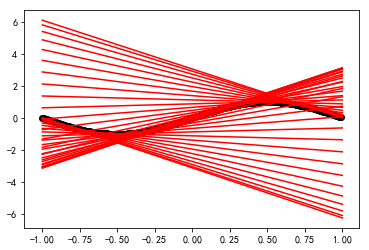

In [80]:
for i in Y1:
    plt.plot(X1,i,c='RED')
plt.scatter(X2,Y2,c='BLACK')
#plt.ylim(-2.0,2.0)
#plt.xlim(-2.0,2.0)
plt.show()

(b)

(i)现在误差函数为$S_1=(ax_1-y_1)^2+(ax_2-y_2)^2$，我们来对这个式子做简单的处理
$$
\begin{aligned}
S_1&=(ax_1-y_1)^2+(ax_2-y_2)^2
\\&=(x_1^2+x_2^2)a^2-2(x_1y_1+x_2y_2)a+(y_1^2+y_2^2)
\end{aligned}
$$
由二次函数的性质，我们知道当$a=\frac{x_1y_1+x_2y_2}{x_1^2+x_2^2}$时，$S_1$最小

(ii)和上一题一样的处理方法。

In [167]:
#定义误差函数
def s1_b(x,x1,x2):
    y1=f(x1)
    y2=f(x2)
    #为了防止分母为0
    try:
        a=(x1*y1+x2*y2)/(x1**2+x2**2)
    except:
        a=(x1*y1+x2*y2)/(x1**2+x2**2+10**(-6))
    y=f(x)
    y1=a*x
    return 1/8*(y-y1)**2

from scipy import integrate
integrate.tplquad(s1_b, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)

(0.507219461635839, 1.3595152276862434e-08)

(iii)依旧和上一题同样的处理方法

In [169]:
import random

#模拟求出系数
def simulation_b(n):
    a=0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1=random.uniform(-1,1)
        x2=random.uniform(-1,1)
        y1=f(x1)
        y2=f(x2)
        a1=(x1*y1+x2*y2)/(x1**2+x2**2)
        a+=a1
    return(a/n)

#比较下10000次以上的结果
n=range(10**4,10**5+1,10**4)
result=[]
for i in n:
    temp=simulation_b(i)
    print(temp)
    result.append(temp)

1.4200452579450005
1.4361549290329403
1.4323122336941063
1.4294661412749146
1.4327243249608024
1.431817600645193
1.428807063887397
1.4229954500221687
1.4303862267979082
1.4312748986249892


取$a=1.4312748986249892$

In [172]:
a1=1.4312748986249892

def bias_b(x):
    y1=a1*x
    y2=f(x)
    return (y1-y2)**2/2

integrate.quad(bias_b,-1,1)

(0.2716713783199174, 3.7937944622448797e-10)

In [173]:
def var_b(x,x1,x2):
    y1=f(x1)
    y2=f(x2)
    try:
        a=(x1*y1+x2*y2)/(x1**2+x2**2)
    except:
        a=(x1*y1+x2*y2)/(x1**2+x2**2+10**(-6))
    yavg=a1*x
    yrea=a*x
    return 1/8*(yavg-yrea)**2

integrate.tplquad(var_b, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)

(0.23657944182387183, 1.4859571695348272e-08)

可看看到$var+bias$和(ii)中求出的数值几乎相等，再一次验证了课本上的结论。

(c)

(i)现在误差函数为$S_1=(b-y_1)^2+(b-y_2)^2$，我们来对这个式子做简单的处理
$$
\begin{aligned}
S1&=2b^2-2(y_1+y_2)b+y_1^2+y_2^2
\end{aligned}
$$
由二次函数的性质，我们知道当$b=\frac{y_1+y_2}{2}$时，S1最小

(ii)和上一题一样的处理方法。

In [175]:
#定义误差函数
def s1_c(x,x1,x2):
    y1=f(x1)
    y2=f(x2)
    #为了防止分母为0
    b=(y1+y2)/2
    y=f(x)
    y1=b
    return 1/8*(y-y1)**2

from scipy import integrate
integrate.tplquad(s1_c, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)

(0.75, 9.174802559227526e-11)

(iii)依旧和上一题同样的处理方法

In [176]:
import random

#模拟求出系数
def simulation_c(n):
    b=0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1=random.uniform(-1,1)
        x2=random.uniform(-1,1)
        y1=f(x1)
        y2=f(x2)
        b1=(y1+y2)/2
        b+=b1
    return(b/n)

#比较下10000次以上的结果
n=range(10**4,10**5+1,10**4)
result=[]
for i in n:
    temp=simulation_c(i)
    print(temp)
    result.append(temp)

0.008196859582491021
0.004748963983807663
-0.0016901880747358293
0.0040040873344500995
0.0012692905572415974
-0.0009000059860267343
0.0013013029957423944
0.00221990817969627
-0.0007085095487530242
0.002409096191388286


依旧选取最后一组数据,$b=0.002409096191388286$

In [177]:
b1=0.002409096191388286

def bias_c(x):
    y1=b1
    y2=f(x)
    return (y1-y2)**2/2

integrate.quad(bias_c,-1,1)

(0.5000058037444595, 3.669920676267717e-10)

In [181]:
def var_c(x,x1,x2):
    y1=f(x1)
    y2=f(x2)
    b=(y1+y2)/2
    yavg=b1
    yrea=b
    return 1/8*(yavg-yrea)**2

integrate.tplquad(var_b, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)

(0.23657944182387183, 1.4859571695348272e-08)

和书上页基本一致。

最后总结一下，这题设计的目的是让我们从实验中验证$bias,var$的等式，我一开始这题完全没有头绪，不过后来做完之后对这部分理解更加深刻了。

#### Problem 2.24 (Page 75)

Consider a simplified learning scenario. Assume that the input dimension is one. Assume that the input variable $x$ is uniformly distributed in the interval $[-1, 1]$ . The data set consists of 2 points $\{ x_1, x_2\}$ and assume that the target function is $f(x) = x^2$. Thus, the full data set is $D= \{(x_1 , x_1^2), (x_2, x_2^2)\}$. The learning algorithm returns the line fitting these two points as $g$ ($\mathcal H$ consists of functions of the frm $h(x) = ax + b$). We are interested in the test performance ($E_{out}$) of our learning system with respect to the squared error measure, the bias and the var. 

(a) Give the analytic expression fr the average function $\overline g(x)$. 

(b) Describe an experiment that you could run to determine (numerically) $\overline g(x)$ , $E_{out}$, bias, and var. 

(c) Run your experiment and report the results. Compare Bout with bias+var. Provide a plot of your $\overline g(x)$ and $f(x)$ (on the same plot) . 

(d) Compute analytically what $E_{out}$. bias and var should be.    

这题其实和上一题的(a)基本一样，只不过这里的$f(x)=x^2$

(a)对于固定的两个点$D= \{(x_1 , x_1^2), (x_2, x_2^2)\}$，训练误差最小的直线为过这两个点的直线，假设直线为$g(x) = ax + b$，因此
$$
x_2^2=ax_2+b
\\x_1^2=ax_1+b
\\a=(x_1+x_2)
\\b=-x_1x_2
$$
那么$g(x) = (x_1+x_2)x -x_1x_2$

假设有$D_1,...,D_K$这$K$组数据，每个$D_i$有两个点$x_{i1},x_{i2}$，那么$D_i$训练出来的$g_i(x)=(x_{i1}+x_{i2})x -x_{i1}x_{i2}$，回到课本63页$\overline g(x)$的定义可知
$$
\overline{g}(x)=\frac 1 K\sum_{i=1}^Kg_i(x)
$$
(b)这部分就是采用数值解，和上一题采用的方法同理。

$\overline{g}(x)$我采取的方法是在$[-1,1]$上随机取两个点(均匀分布)，然后计算对应的$g_i(x)$，重复这实验多次，利用$\overline{g}(x)=\frac 1 K\sum_{i=1}^Kg_i(x)$计算。

再来看下$E_{out}(g^{(D)})$,注意书上的公式
$$
E_{out}(g^{(D)})=E_x \left [(g^{(D)}(x)-f(x))^2\right]
$$
我们已经知道对于$D= \{(x_1 , x_1^2), (x_2, x_2^2)\}$，$g(x) = (x_1+x_2)x -x_1x_2$，带入上式计算关于$x_1,x_2,x$的三重积分即可。

$bias$可以参考课本63页的公式
$$
bias(x) = (\overline g(x) - f(x))^2,bias=E_x[bias(x)]
$$
之前已经计算出了$\overline g(x)$，带入上式做积分即可。

$var$可以参考课本64页的公式
$$
var(x)=E_D[(g^{(D)} (x) - \overline g(x))^2],var=E_x[var(x)]
$$
我们已经知道对于$D= \{(x_1 , x_1^2), (x_2, x_2^2)\}$，$g(x) = (x_1+x_2)x -x_1x_2$，带入上式计算关于$x_1,x_2,x$的三重积分即可。

(c)下面通过模拟计算一下，先计算$\overline g(x)$。

In [2]:
import random

def f(x):
    return x**2

#模拟求出系数
def simulation(n):
    a=0
    b=0
    #模拟n次
    for i in range(n):
        #产生-1,1之间均匀分布随机数
        x1=random.uniform(-1,1)
        x2=random.uniform(-1,1)
        y1=f(x1)
        y2=f(x2)
        a1=(x1+x2)
        b1=-x1*x2
        a+=a1
        b+=b1
    return(a/n,b/n)

#比较下10000次以上的结果
n=range(10**4,10**5+1,10**4)
result=[]
for i in n:
    temp=simulation(i)
    print(temp)
    result.append(temp)

(0.001936147957465867, -0.0013630419506564689)
(-0.0011100104837898294, 0.0007106102904249165)
(0.007036228804454655, 0.0022387392986593763)
(0.0036037885530697594, -0.0025503664604139744)
(-0.0021659042920975703, 0.0005807937629647986)
(0.005749093303044227, 0.0006208087771658737)
(-0.0005984132463209331, -0.00011264502000000663)
(0.0014864777632894372, -0.0014178489060713278)
(-0.0009288612232758783, 0.0007764903473425881)
(0.0029127592564764616, -0.0010760763093043003)


可以看到后面的结果已经比较接近了，我们这里取最后一组数据，然后作图。

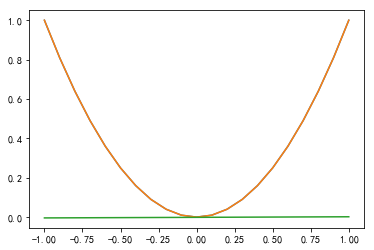

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

a,b=result[-1]
x1=np.arange(-1,1.1,0.1)
y1=[f(i) for i in x1]
x2=[-1,1]
y2=[a*i+b for i in x2]

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

计算$E_{out}(g^{(D)})$

In [10]:
from scipy import integrate

#定义误差函数
def s1(x,x1,x2):
    y1=f(x1)
    y2=f(x2)
    a=(x1+x2)
    b=-x1*x2
    y=f(x)
    y1=a*x+b
    return 1/8*(y-y1)**2

integrate.tplquad(s1, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)

(0.5333333333333333, 8.785771717918444e-15)

$bias$

In [13]:
def bias(x):
    a,b=result[-1]
    y1=a*x+b
    y2=f(x)
    return (y1-y2)**2/2

integrate.quad(bias,-1,1)

(0.2007213702019217, 2.228454867324833e-15)

$var$

In [14]:
def var(x,x1,x2):
    a,b=result[-1]
    yavg=a*x+b
    y1=f(x1)
    y2=f(x2)
    a1=(x1+x2)
    b1=-x1*x2
    yrea=a1*x+b1
    return 1/8*(yavg-yrea)**2

integrate.tplquad(var, -1, 1, lambda x: -1, lambda x: 1,lambda x, y: -1, lambda x, y: 1)

(0.3333373193290522, 6.401147296799422e-15)

可以看到$E_{out}(g^{(D)})=bias+var$

(d)计算$E_{out},bias,var​$的解析解，只要分别计算积分即可。

先看$E_{out}$
$$
\begin{aligned}
E_{out}&=E_x \left[ ((x_1+x_2)x -x_1x_2-x^2)^2\right]
\\&=\frac 1 8\int _{-1}^{1}\int _{-1}^{1}\int _{-1}^{1}\Big [(x-x_2)x_1+x_2x-x^2\Big]^2dx_1dx_2dx
\\&=\frac 1 8\int _{-1}^{1}\int _{-1}^{1}\int _{-1}^{1}\Big [(x-x_2)^2x_1^2+2(x-x_2)x_1(x_2x-x^2)+(x_2x-x^2)^2\Big]dx_1dx_2dx
\\&=\frac 1 8\int _{-1}^{1}\int _{-1}^{1}\Big [ \frac {2(x-x_2)^2}{3}+2(x_2x-x^2)^2\Big]dx_2dx
\\&=\frac 1 8\int _{-1}^{1}\int _{-1}^{1}\Big [\frac23(x^2-2xx_2+x_2^2)+2x^2(x_2^2-2xx_2+x^2) \Big]dx_2dx
\\&=\frac 1 8\int _{-1}^{1}(\frac23+2x^2)(\frac 2 3+2x^2)dx
\\&=\frac 1 8\int _{-1}^{1}(\frac 4 9+4x^4+\frac 8 3x^2)dx
\\&=\frac 1 8(\frac 8 9+\frac 8 5+\frac 16 9)
\\&=\frac 1 3+\frac 15
\\&\approx 0.53
\end{aligned}
$$
可以看到和我们之前模拟的数值解基本一致。

求$bias,var$之前，先得求$\overline g(x)$，设$\overline g(x)=ax+b$。我们知道对于$D= \{(x_1 , x_1^2), (x_2, x_2^2)\}$，$g(x) = (x_1+x_2)x -x_1x_2$，那么由$\overline g(x)$的定义我们知道
$$
a=E(x_1+x_2),b=E(-x_1x_2)
$$
那么
$$
\begin{aligned}
a&=E(x_1+x_2)
\\&=\frac 1 4\int_{-1}^1\int_{-1}^1(x_1+x_2)dx_1dx_2
\\&=\frac 1 4 \int_{-1}^12x_2dx_2
\\&=0
\end{aligned}
$$

$$
\begin{aligned}
b&=E(-x_1x_2)
\\&=\int_{-1}^1\int_{-1}^1(-x_1x_2)dx_1dx_2
\\&=-\int_{-1}^1x_1dx_1\int_{-1}^1x_2dx_2
\\&=0
\end{aligned}
$$

因此$\overline g(x)=0$，接下来求$bias$
$$
\begin{aligned}
bias&=E_x[(\overline g(x) - f(x))^2]
\\&=\int_{-1}^1x^4dx
\\&=0.2
\end{aligned}
$$
和我们之前模拟的结果一致。

最后求$var$
$$
\begin{aligned}
var&=E_x[E_D[(g^{(D)} (x) - \overline g(x))^2]]
\\&=\frac 1 8\int _{-1}^{1}\int _{-1}^{1}\int _{-1}^{1}\Big[(x_1+x_2)x -x_1x_2\Big]^2dxdx_1dx_2
\\&=\frac 1 8\int _{-1}^{1}\int _{-1}^{1}\int _{-1}^{1}\Big[ (x_1+x_2)^2x^2+x_1^2x_2^2-2x_1x_2(x_1+x_2)x\Big]dxdx_1dx_2
\\&=\frac 1 8\int _{-1}^{1}\int _{-1}^{1}\Big[\frac{2(x_1^2+x_2^2+2x_1x_2)}{3}+2x_1^2x_2^2 \Big]dx_1dx_2
\\&=\frac 1 8\int _{-1}^{1}\Big[{\frac 4 9+\frac{4}{3}x_2^2+\frac 4 3 x_2^2}\Big]dx_2
\\&=\frac 1 8(\frac 8 9+\frac {16} 9)
\\&=\frac 1 3
\\&\approx0.33
\end{aligned}
$$
和我们之前模拟的结果也一致